In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import json
from tqdm.notebook import tqdm
import numpy as np
import itertools as it

In [2]:
df_metadata = pd.read_csv("datasets.csv")
df_metadata

openmlid                    Name  AutoCorrelation  ClassEntropy  \
0           3                kr-vs-kp         0.999061      0.998576   
1           6                  letter         0.040902      4.699811   
2          12           mfeat-factors         0.995498      3.321928   
3          14           mfeat-fourier         0.995498      3.321928   
4          16          mfeat-karhunen         0.995498      3.321928   
..        ...                     ...              ...           ...   
214     41169                  helena         0.023085      5.977668   
215     41946            Sick_numeric         0.886502      0.332351   
216     42732     sf-police-incidents         0.794053           NaN   
217     42733  Click_prediction_small         0.717025           NaN   
218     42734            okcupid-stem         0.566925           NaN   

     Dimensionality  EquivalentNumberOfAtts  MajorityClassSize  \
0          0.011577               52.140402             1669.0   
1          0.000850                     NaN              813.0   
2          0.108500                     NaN              200.0   
3          0.038500                     NaN              200.0   
4          0.032500                     NaN              200.0   
..              ...                     ...                ...   
214        0.000429                     NaN             4005.0   
215        0.007953                     NaN             3541.0   
216        0.000004                     NaN          1945704.0   
217        0.000300                     NaN            33220.0   
218        0.000394                     NaN            36350.0   

     MaxAttributeEntropy  MaxKurtosisOfNumericAtts  MaxMeansOfNumericAtts  \
0               0.995652                       NaN                    NaN   
1                    NaN                  2.075245               8.338850   
2                    NaN                  1.701286            1141.570500   
3                    NaN                  1.994923               0.377311   
4                    NaN                  0.580943               2.891171   
..                   ...                       ...                    ...   
214                  NaN                266.331723             125.499915   
215                  NaN               3772.000000             126.282609   
216                  NaN                       NaN                    NaN   
217                  NaN                       NaN                    NaN   
218                  NaN                       NaN                    NaN   

     ...  Quartile2MutualInformation  Quartile2SkewnessOfNumericAtts  \
0    ...                    0.005426                             NaN   
1    ...                         NaN                        0.254335   
2    ...                         NaN                       -0.014119   
3    ...                         NaN                        0.554228   
4    ...                         NaN                       -0.020816   
..   ...                         ...                             ...   
214  ...                         NaN                        0.389840   
215  ...                         NaN                        2.296469   
216  ...                         NaN                             NaN   
217  ...                         NaN                             NaN   
218  ...                         NaN                             NaN   

     Quartile2StdDevOfNumericAtts  Quartile3AttributeEntropy  \
0                             NaN                   0.913233   
1                        2.293372                        NaN   
2                       30.290066                        NaN   
3                        0.052759                        NaN   
4                        1.647651                        NaN   
..                            ...                        ...   
214                      3.054119                        NaN   
215                      0.241253            

In [3]:
def get_dataset_size(openmlid):
    return tuple(df_metadata.query(f"openmlid == {openmlid}")[["NumberOfInstances", "NumberOfFeatures"]].values[0])

def get_dataset_name(openmlid):
    return df_metadata.query(f"openmlid == {openmlid}")["Name"].values[0]

In [4]:
df_base = pd.read_csv("results_base.csv", sep=";")
for key in ["oob", "test"]:
    df_base[f"scores_{key}"] = [json.loads(e) for e in df_base[f"scores_{key}"]]
    df_base[f"score_{key}_final"] = [np.mean(e[-99:]) for e in df_base[f"scores_{key}"]]
df_base["max_trees_8"] = (8 * 1024 / np.maximum(df_base["memory_per_tree"], 0.00001)).astype(int)
df_base["max_trees_16"] = (16 * 1024 / np.maximum(df_base["memory_per_tree"], 0.00001)).astype(int)
df_base

openmlid  seed  memory_per_tree  train_time_per_tree_in_ms  \
0            3     0         0.035512                   3.032584   
1            3     1         0.000719                   3.305645   
2            3     3         0.036209                   3.173010   
3            3     4         0.036766                   3.073337   
4            3     6         0.036496                   2.996847   
...        ...   ...              ...                        ...   
1938     41946     5         0.000000                   3.467125   
1939     41946     6         0.000000                   3.304031   
1940     41946     7         0.000000                   3.210579   
1941     41946     8         0.015234                   3.086541   
1942     41946     9         0.003800                   3.159081   

      dist_time_per_tree_in_ms  \
0                     0.000000   
1                     0.000951   
2                     0.011424   
3                     0.000145   
4                     0.000000   
...                        ...   
1938                  0.002676   
1939                  0.000762   
1940                  0.000167   
1941                  0.000000   
1942                  0.000168   

                                             scores_oob  \
0     [0.6934, 0.5212, 0.4277, 0.3644, 0.3214, 0.287...   
1     [0.695, 0.5247, 0.4308, 0.3684, 0.3237, 0.287,...   
2     [0.6683, 0.4963, 0.4072, 0.3472, 0.3078, 0.276...   
3     [0.6733, 0.5135, 0.4262, 0.3657, 0.3225, 0.289...   
4     [0.6742, 0.508, 0.4197, 0.354, 0.3127, 0.2794,...   
...                                                 ...   
1938  [0.6582, 0.4804, 0.3951, 0.3391, 0.2995, 0.268...   
1939  [0.6575, 0.4841, 0.3963, 0.3412, 0.3047, 0.272...   
1940  [0.6653, 0.4875, 0.4018, 0.3442, 0.3058, 0.276...   
1941  [0.6554, 0.4844, 0.3977, 0.3394, 0.3017, 0.271...   
1942  [0.6723, 0.4906, 0.4047, 0.3471, 0.3063, 0.274...   

                                            scores_test  score_oob_final  \
0     [0.3238, 0.174, 0.1216, 0.0943, 0.0723, 0.0617...           0.0291   
1     [0.3389, 0.1957, 0.1282, 0.0983, 0.0748, 0.060...           0.0291   
2     [0.3163, 0.1734, 0.1132, 0.0857, 0.072, 0.0615...           0.0302   
3     [0.2976, 0.1873, 0.1279, 0.0927, 0.0721, 0.061...           0.0308   
4     [0.3101, 0.1773, 0.1241, 0.0879, 0.0685, 0.055...           0.0294   
...                                                 ...              ...   
1938  [0.2882, 0.1427, 0.0983, 0.0833, 0.0657, 0.056...           0.0314   
1939  [0.2829, 0.1446, 0.1025, 0.0816, 0.0718, 0.060...           0.0316   
1940  [0.2998, 0.1564, 0.1086, 0.0838, 0.0721, 0.063...           0.0296   
1941  [0.2903, 0.1502, 0.1036, 0.0816, 0.0716, 0.067...           0.0292   
1942  [0.2988, 0.1545, 0.1057, 0.0867, 0.071, 0.0596...           0.0307   

      score_test_final  max_trees_8  max_trees_16  
0             0.026300       230684        461369  
1             0.025900     11395029      22790059  
2             0.028500       226242        452485  
3             0.026604       222815        445631  
4             0.027100       224460        448920  
...                ...          ...           ...  
1938          0.024100    819199999    1638399999  
1939          0.025100    819199999    1638399999  
1940          0.029200    819199999    1638399999  
1941          0.036600       537733       1075466  
1942          0.028500      2155653       4311306  

[1943 rows x 11 columns]

In [5]:
def get_score_on_curve(curve, number_trees):
    return curve[int(min(len(curve), number_trees)) - 1]

# RQ1: Appropriateness of OOB

Violation for key 679 on eps = 0.001. Dataset shape is (1024, 3)
Violation for key 741 on eps = 0.001. Dataset shape is (1024, 3)
Violation for key 1464 on eps = 0.001. Dataset shape is (748, 5)


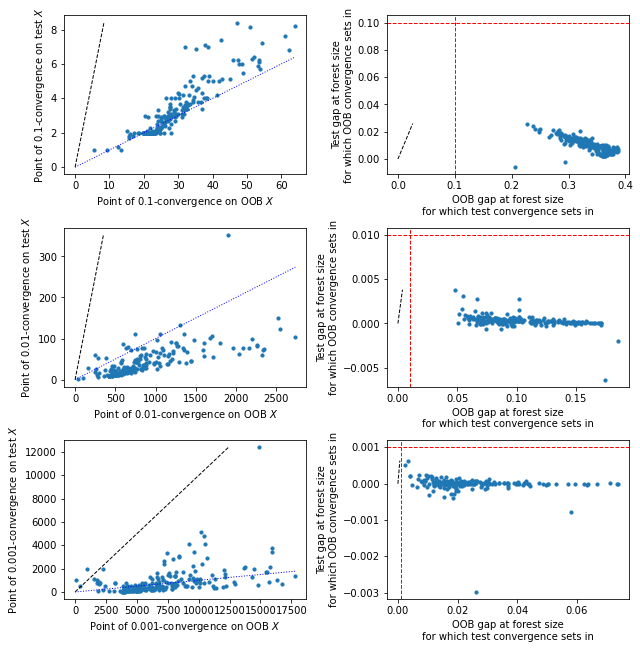

Violation for key (23, 1) on eps = 0.01. Dataset shape is (1473, 10)
Violation for key (41157, 0) on eps = 0.01. Dataset shape is (100, 10001)
Violation for key (18, 1) on eps = 0.001. Dataset shape is (2000, 7)
Violation for key (18, 8) on eps = 0.001. Dataset shape is (2000, 7)
Violation for key (23, 0) on eps = 0.001. Dataset shape is (1473, 10)
Violation for key (23, 1) on eps = 0.001. Dataset shape is (1473, 10)
Violation for key (23, 3) on eps = 0.001. Dataset shape is (1473, 10)
Violation for key (23, 5) on eps = 0.001. Dataset shape is (1473, 10)
Violation for key (23, 6) on eps = 0.001. Dataset shape is (1473, 10)
Violation for key (54, 1) on eps = 0.001. Dataset shape is (846, 19)
Violation for key (679, 0) on eps = 0.001. Dataset shape is (1024, 3)
Violation for key (679, 2) on eps = 0.001. Dataset shape is (1024, 3)
Violation for key (679, 3) on eps = 0.001. Dataset shape is (1024, 3)
Violation for key (679, 4) on eps = 0.001. Dataset shape is (1024, 3)
Violation for key (6

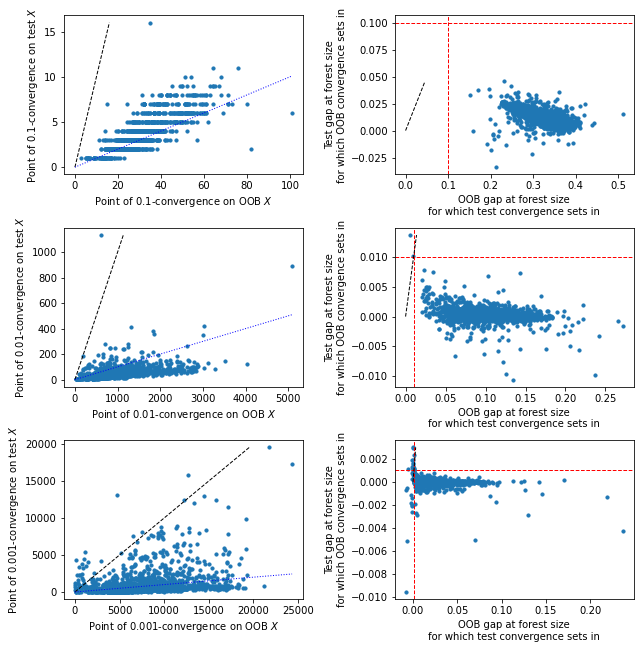

In [6]:
def create_plots(group_attributes):
    domain_eps = [0.1, 0.01, 0.001]
    fig, axs = plt.subplots(len(domain_eps), 2, figsize=(9, 3 * len(domain_eps)))
    for eps, ax_row in zip(domain_eps, axs):
        eps_oob = eps
        eps_test = eps
        convergence_indices_oob = []
        convergence_indices_test = []
        oob_performance_at_test_convergence = []
        test_performance_at_oob_convergence = []
        for key, df_key in df_base.groupby(group_attributes):

            convergence_indices_oob_key = []
            convergence_indices_test_key = []
            oob_performance_at_test_convergence_key = []
            test_performance_at_oob_convergence_key = []
            for j, row in df_key.iterrows():
                oob_gaps = np.array(row["scores_oob"]) - row["score_oob_final"]
                oob_violations = np.where(oob_gaps > eps_oob)[0]
                test_gaps = np.array(row["scores_test"]) - row["score_test_final"]
                test_violations = np.where(test_gaps > eps_test)[0]
                convergence_indices_oob_key.append(np.max(oob_violations) + 1 if len(oob_violations) > 0 else 1)
                convergence_indices_test_key.append(np.max(test_violations) + 1 if len(test_violations) > 0 else 1)
                oob_performance_at_test_convergence_key.append(oob_gaps[convergence_indices_test_key[-1]])
                test_performance_at_oob_convergence_key.append(test_gaps[convergence_indices_oob_key[-1]])
            convergence_indices_oob.append(np.mean(convergence_indices_oob_key))
            convergence_indices_test.append(np.mean(convergence_indices_test_key))
            if convergence_indices_oob[-1] < convergence_indices_test[-1]:
                print(f"Violation for key {key} on eps = {eps}. Dataset shape is {get_dataset_size(key if type(key) == int else key[0])}")
            oob_performance_at_test_convergence.append(np.mean(oob_performance_at_test_convergence_key))
            test_performance_at_oob_convergence.append(np.mean(test_performance_at_oob_convergence_key))

        ax = ax_row[0]
        #means = (np.mean(convergence_indices_oob), np.mean(convergence_indices_test))
        ax.scatter(convergence_indices_oob, convergence_indices_test, s=10)
        tolerance = 0.1 * max(convergence_indices_test)
        #ax.plot([0, max(convergence_indices_test)], [tolerance, tolerance + max(convergence_indices_test)], color="blue", linestyle="--", linewidth=1)
        ax.plot([0, max(convergence_indices_test)], [0, max(convergence_indices_test)], color="black", linestyle="--", linewidth=1)
        ax.plot([0, max(convergence_indices_oob)], [0, 0.1 * max(convergence_indices_oob)], color="blue", linestyle="dotted", linewidth=1)
        ax.set_xlabel(f"Point of {eps_oob}-convergence on OOB $X$")
        ax.set_ylabel(f"Point of {eps_test}-convergence on test $X$")

        ax = ax_row[1]
        ax.scatter(oob_performance_at_test_convergence, test_performance_at_oob_convergence, s=10)
        ax.axvline(eps_oob, color="red", linestyle="--", linewidth=1)
        ax.axhline(eps_test, color="red", linestyle="--", linewidth=1)
        ax.plot([0, max(test_performance_at_oob_convergence)], [0, max(test_performance_at_oob_convergence)], color="black", linestyle="--", linewidth=1)
        ax.set_xlabel(f"OOB gap at forest size\nfor which test convergence sets in")
        ax.set_ylabel(f"Test gap at forest size\nfor which OOB convergence sets in")
    fig.tight_layout()
    fig.savefig(f"plots/oob_suitability_{'_'.join(group_attributes)}.pdf", bbox_inches="tight")
    plt.show()

create_plots(["openmlid"])
create_plots(["openmlid", "seed"])

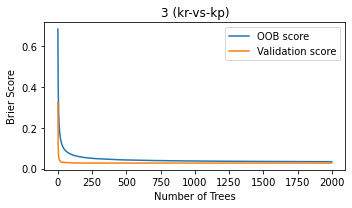

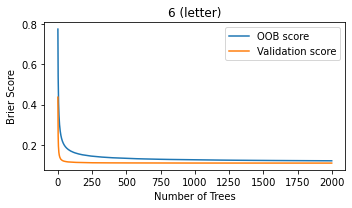

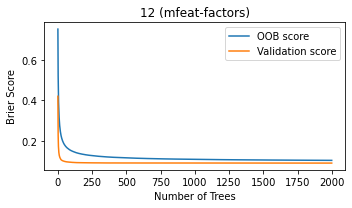

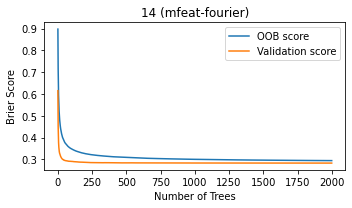

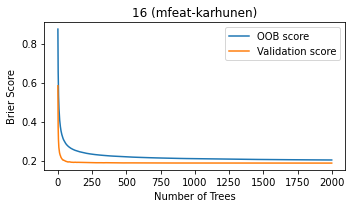

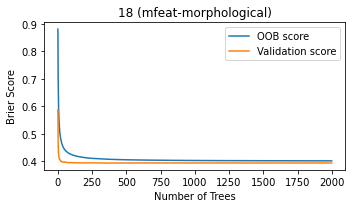

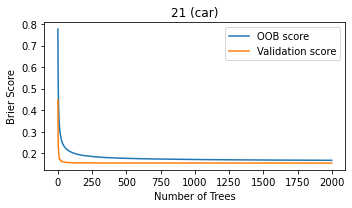

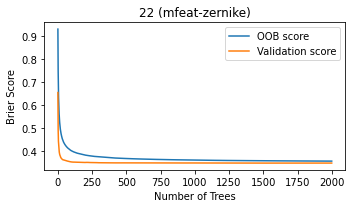

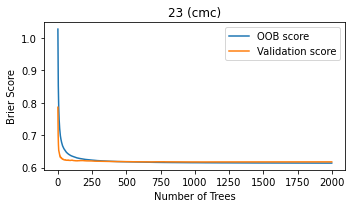

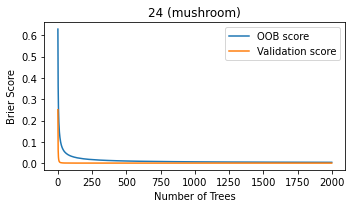

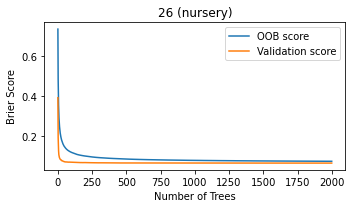

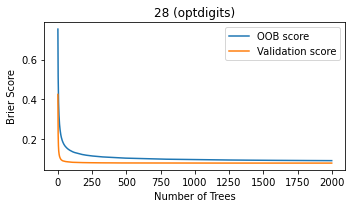

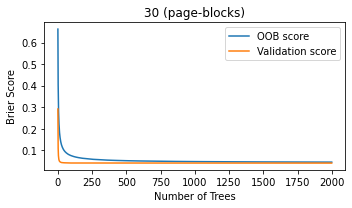

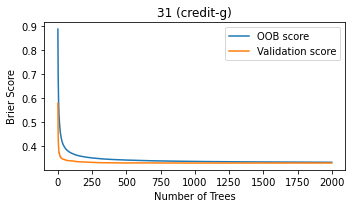

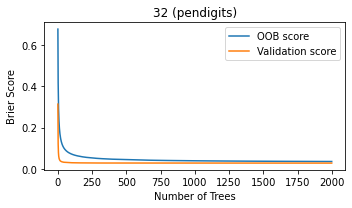

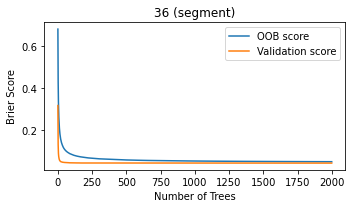

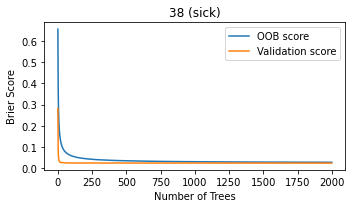

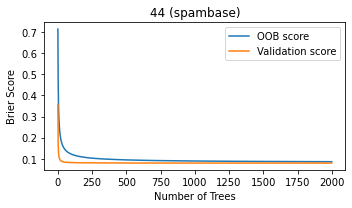

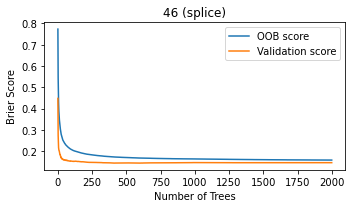

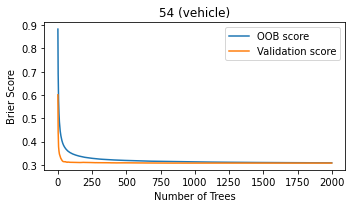

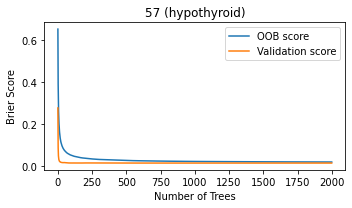

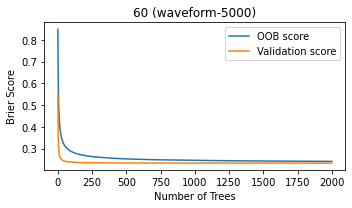

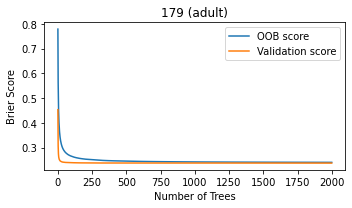

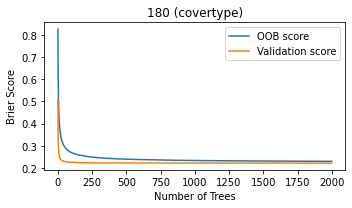

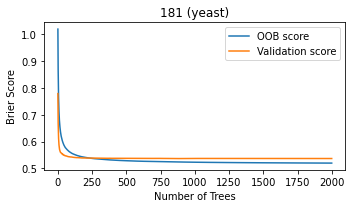

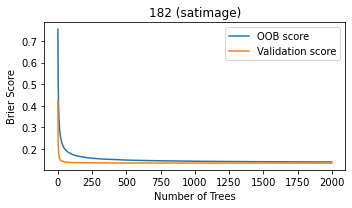

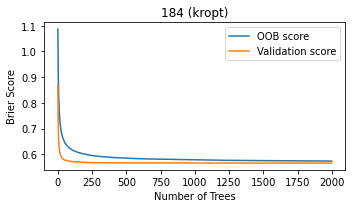

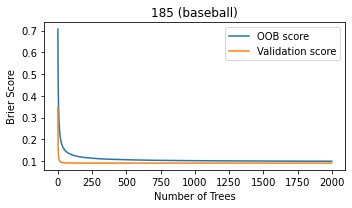

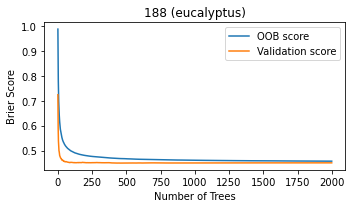

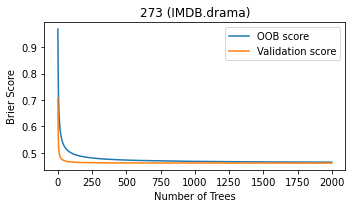

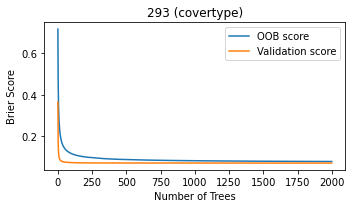

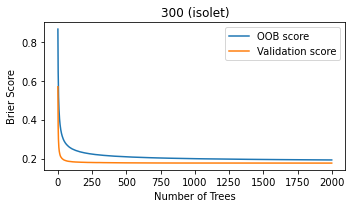

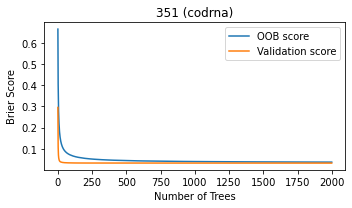

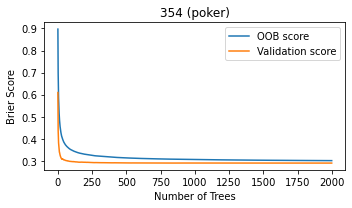

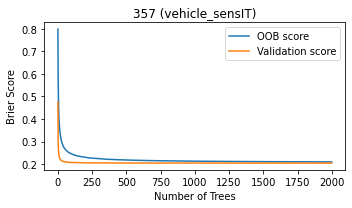

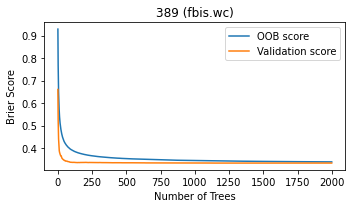

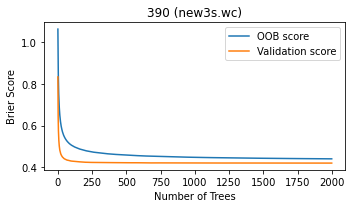

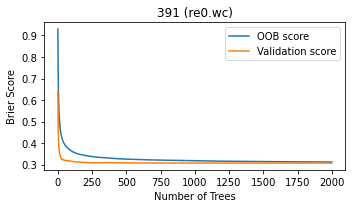

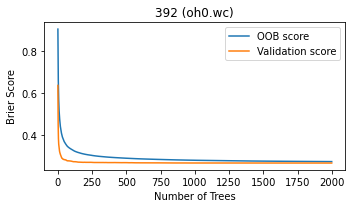

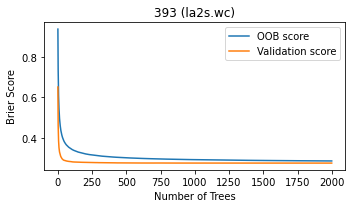

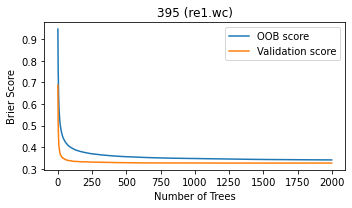

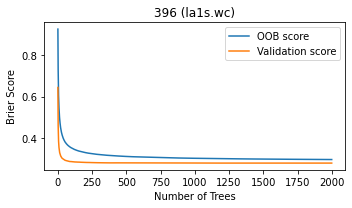

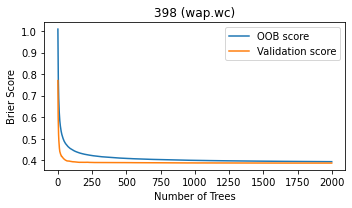

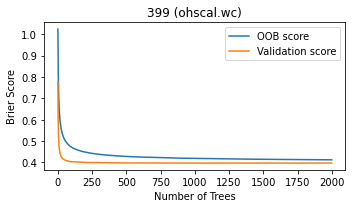

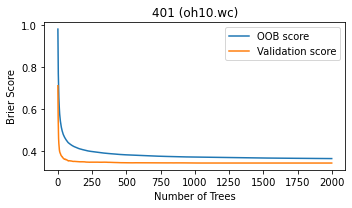

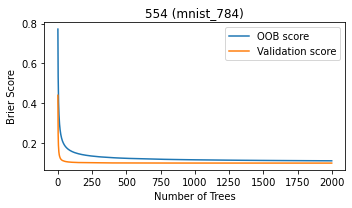

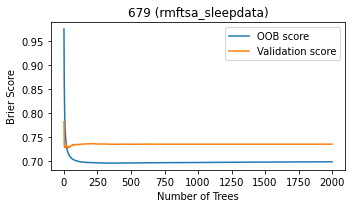

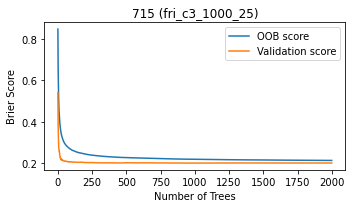

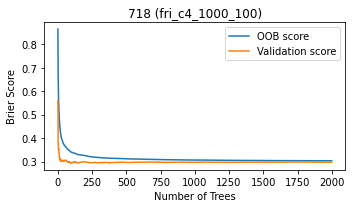

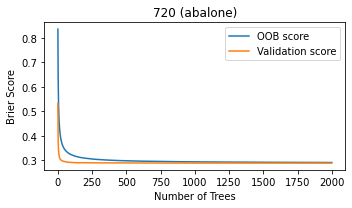

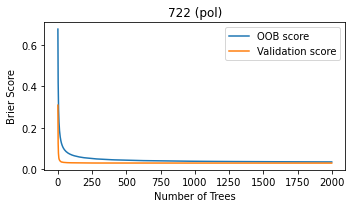

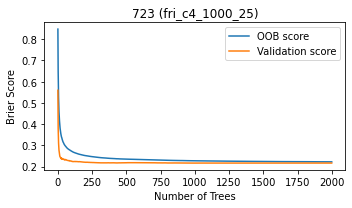

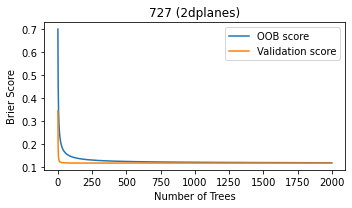

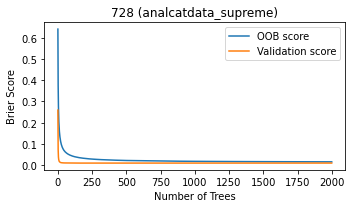

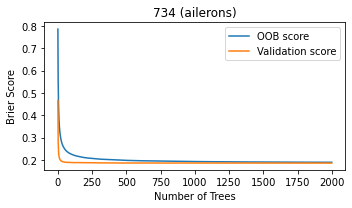

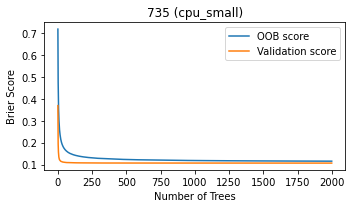

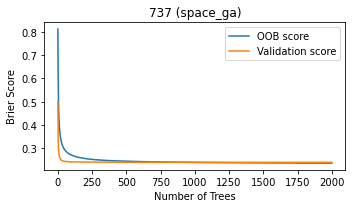

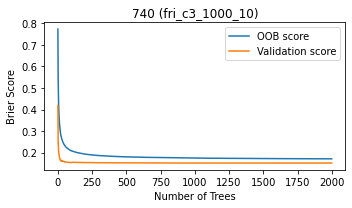

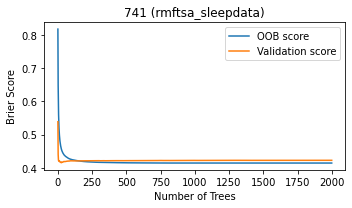

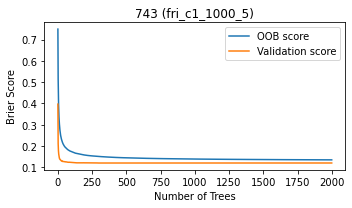

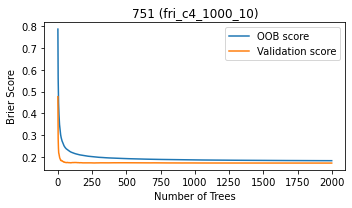

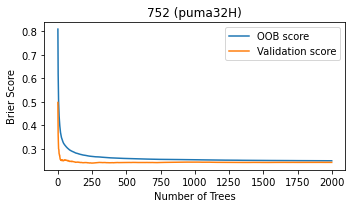

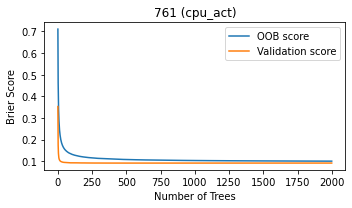

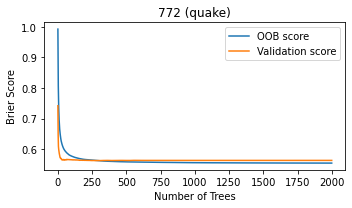

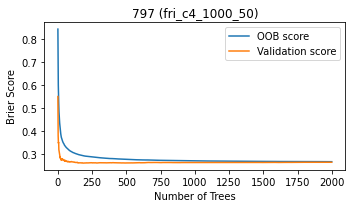

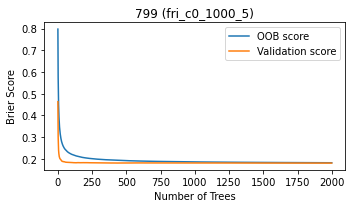

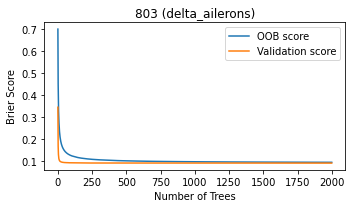

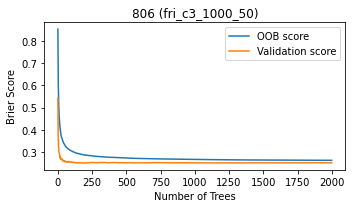

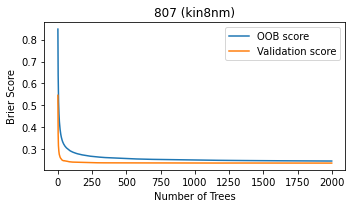

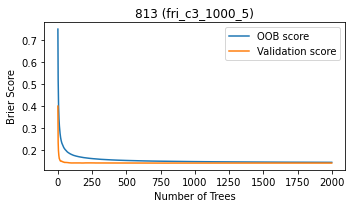

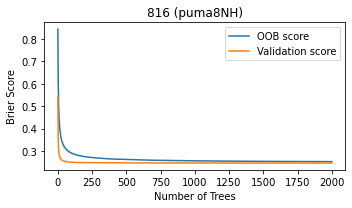

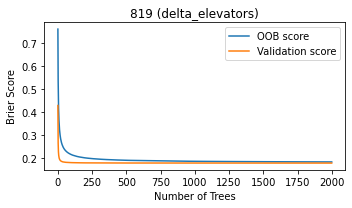

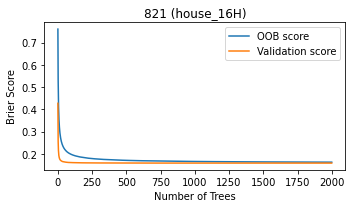

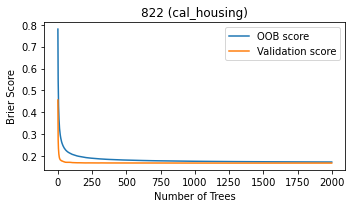

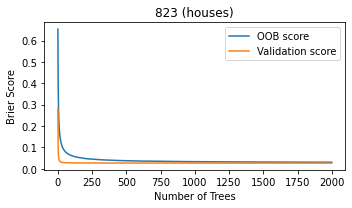

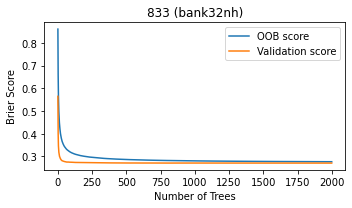

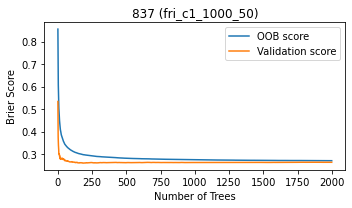

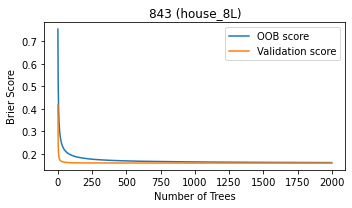

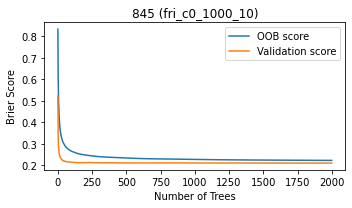

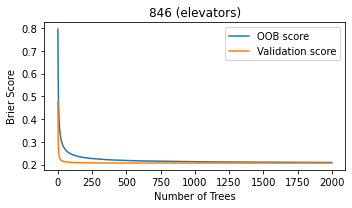

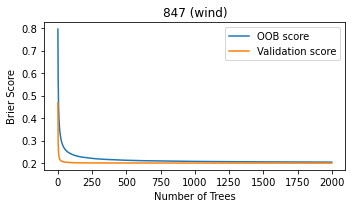

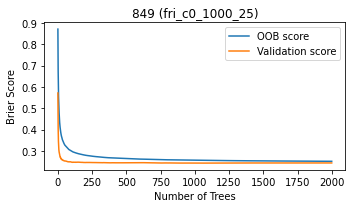

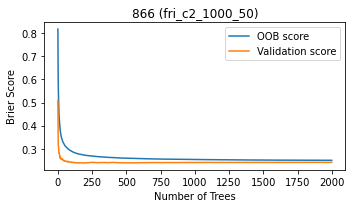

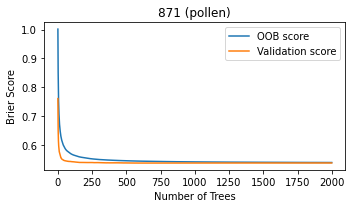

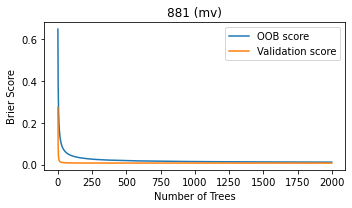

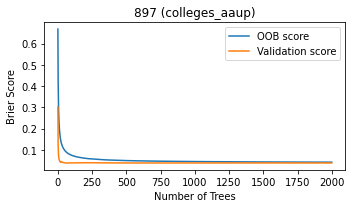

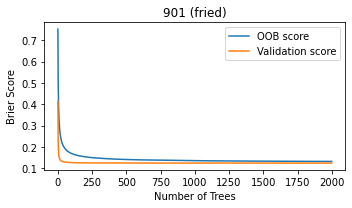

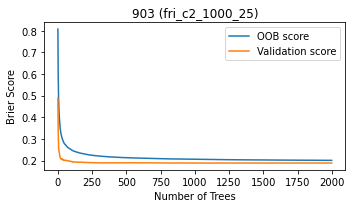

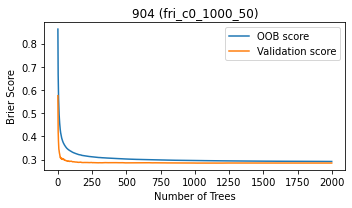

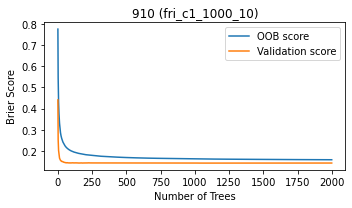

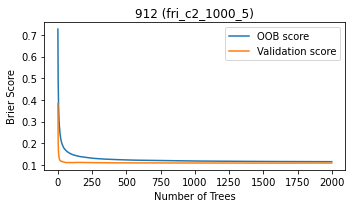

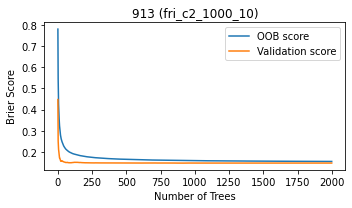

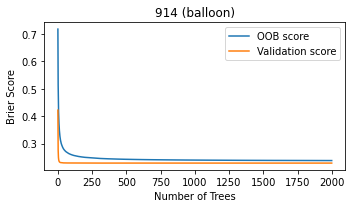

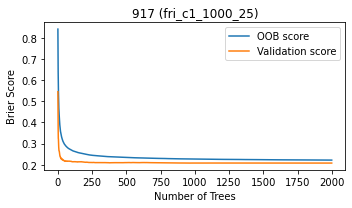

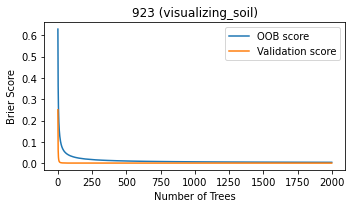

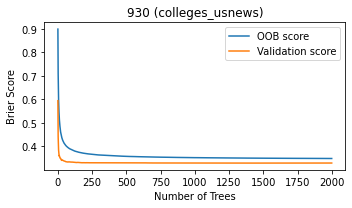

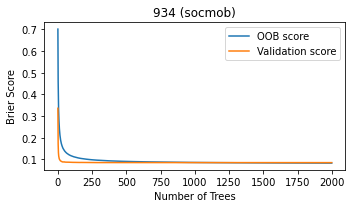

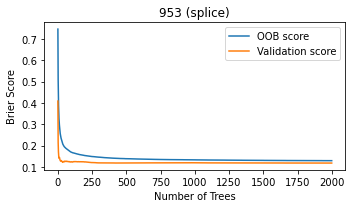

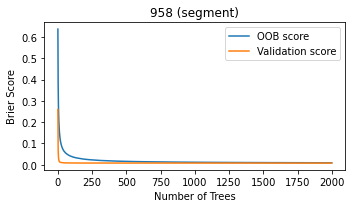

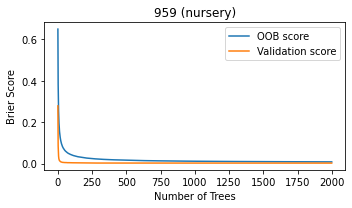

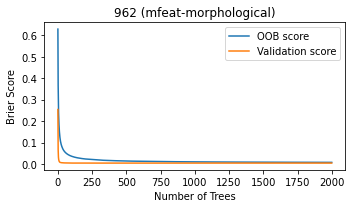

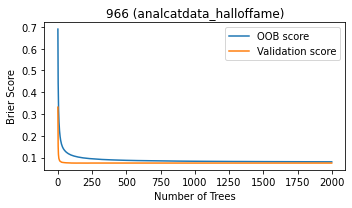

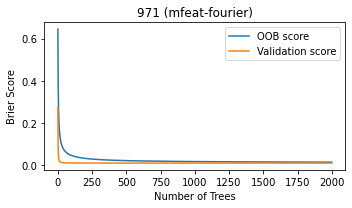

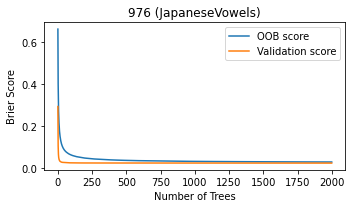

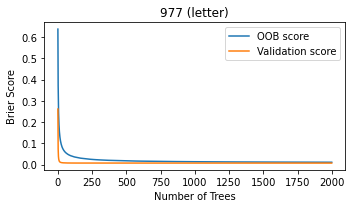

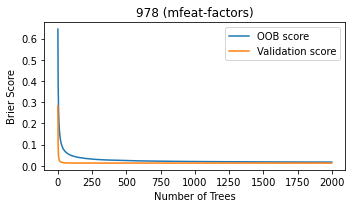

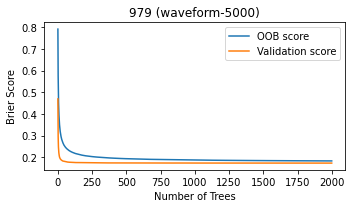

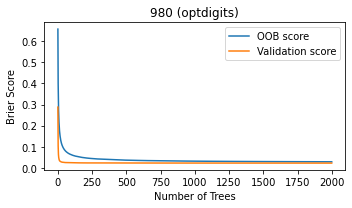

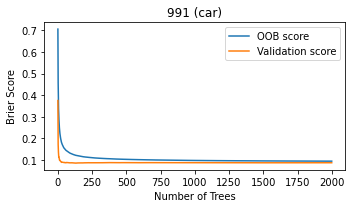

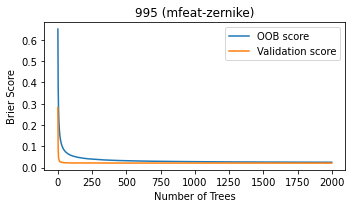

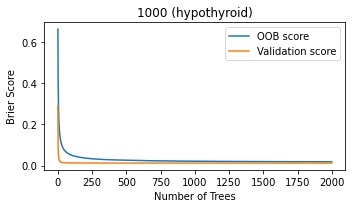

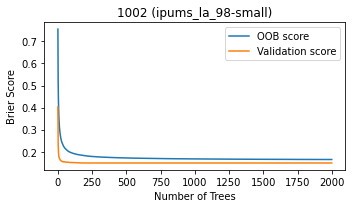

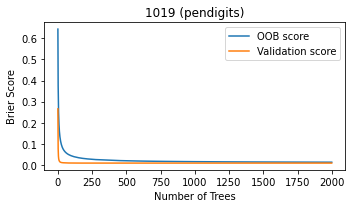

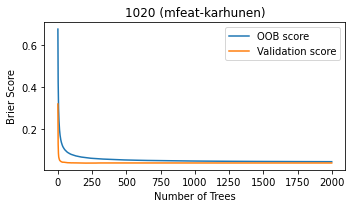

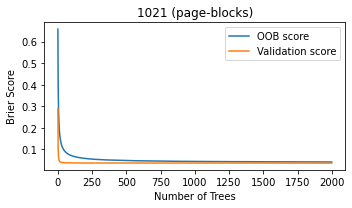

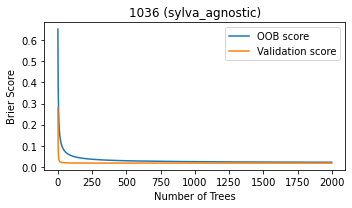

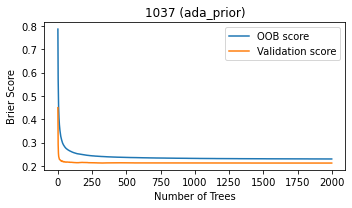

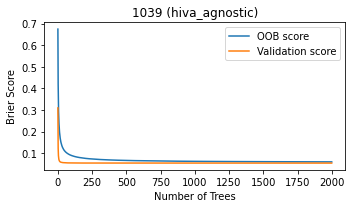

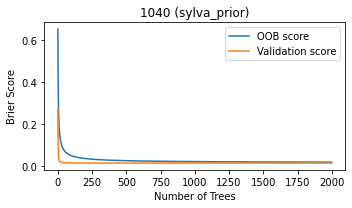

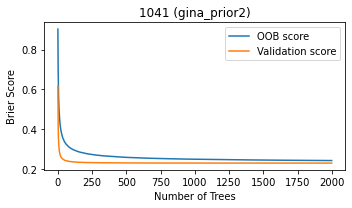

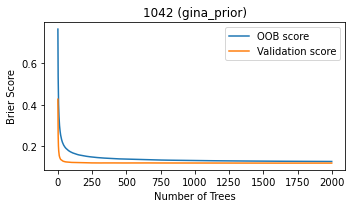

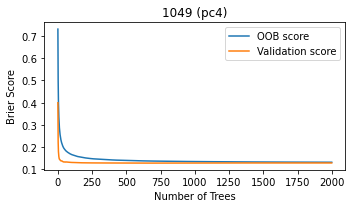

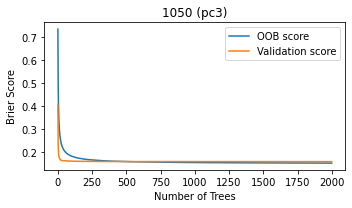

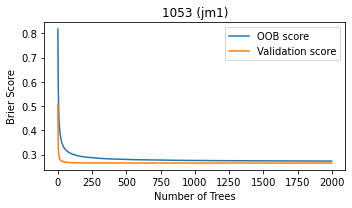

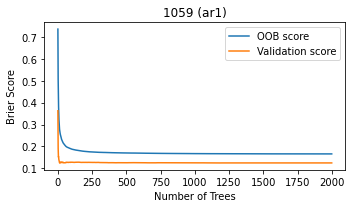

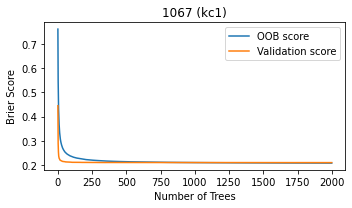

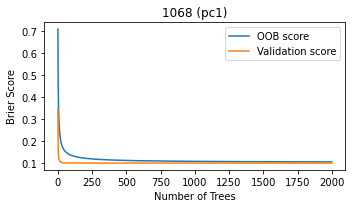

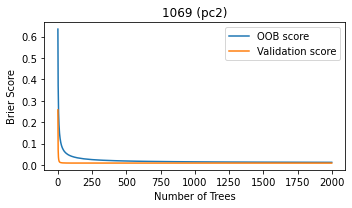

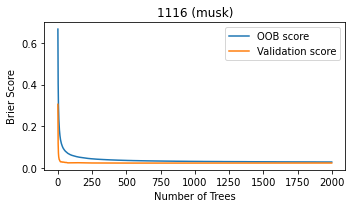

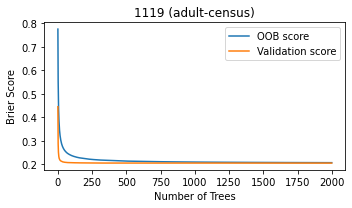

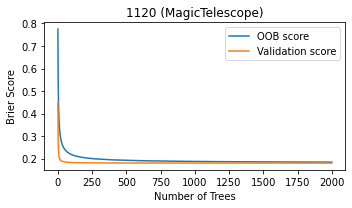

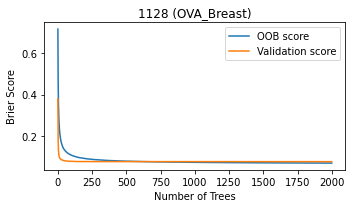

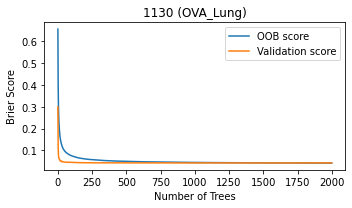

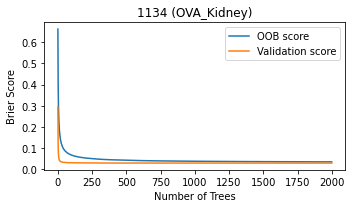

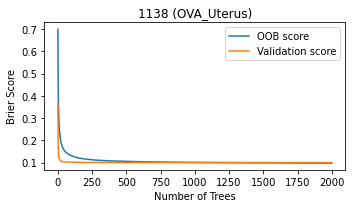

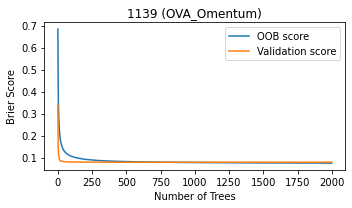

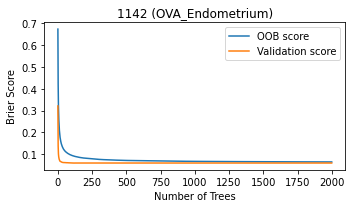

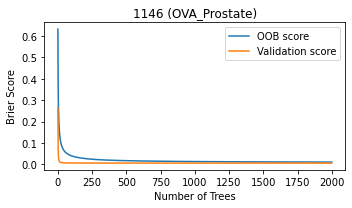

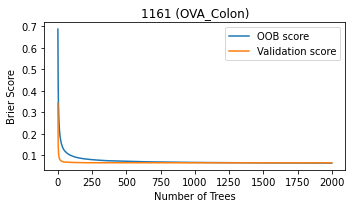

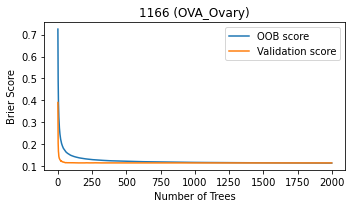

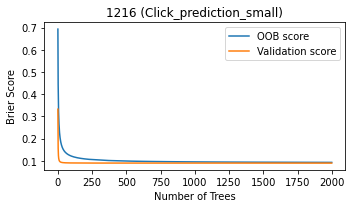

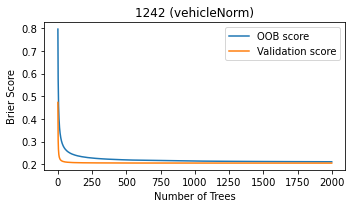

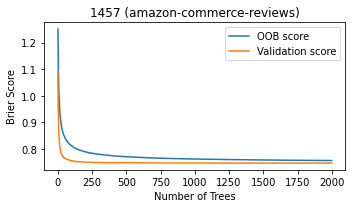

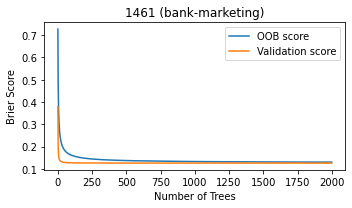

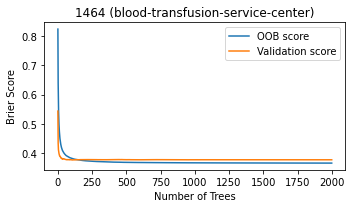

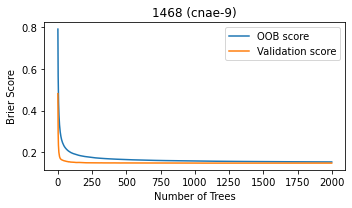

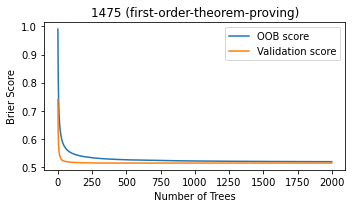

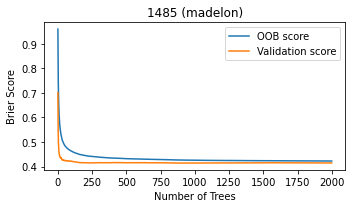

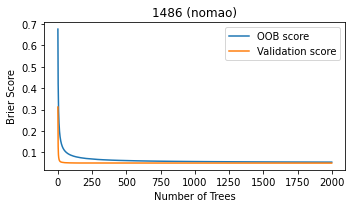

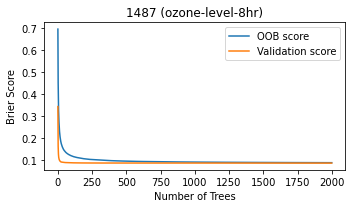

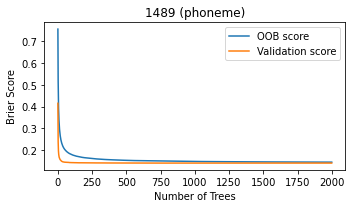

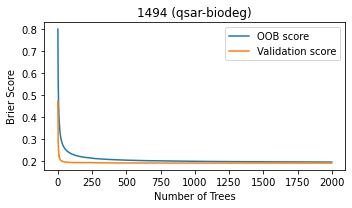

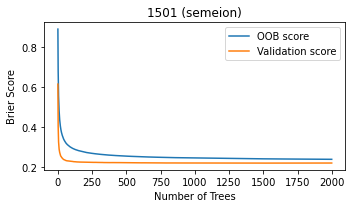

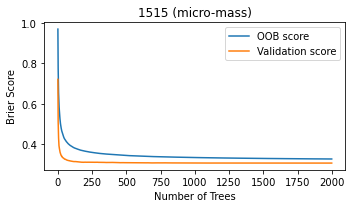

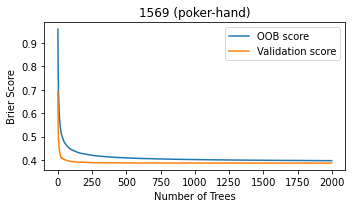

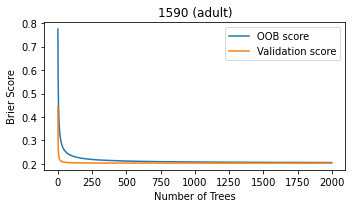

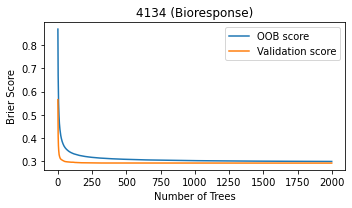

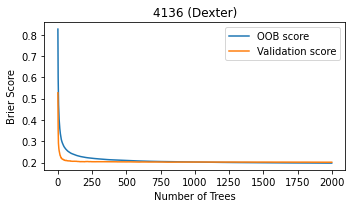

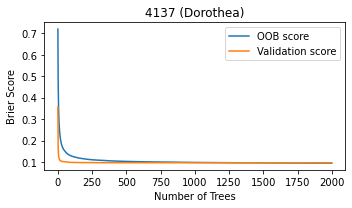

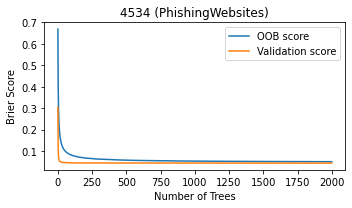

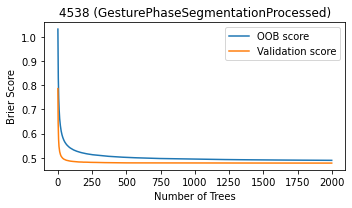

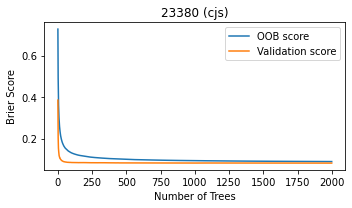

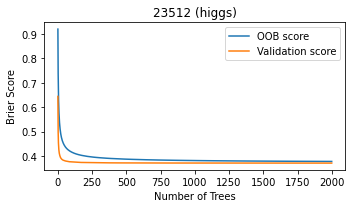

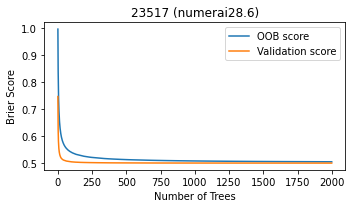

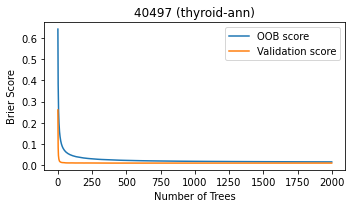

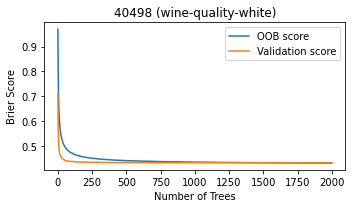

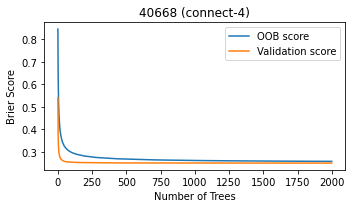

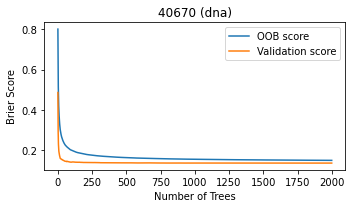

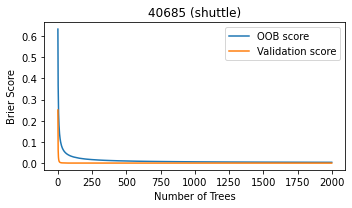

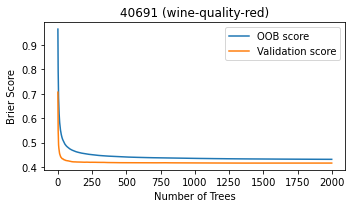

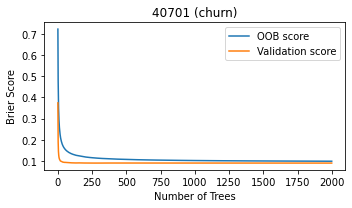

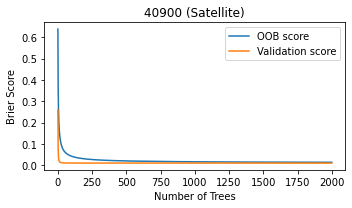

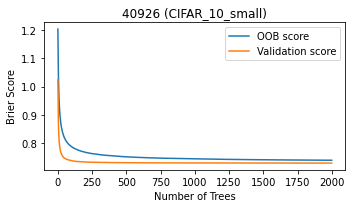

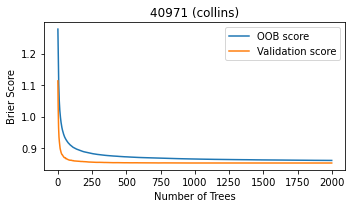

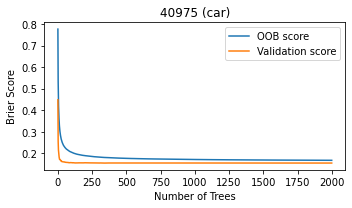

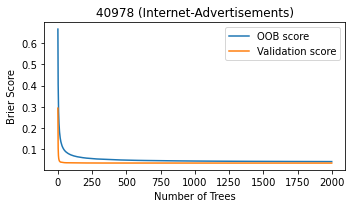

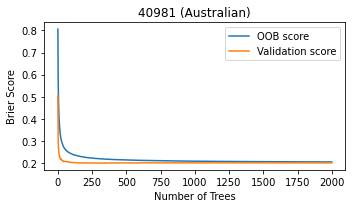

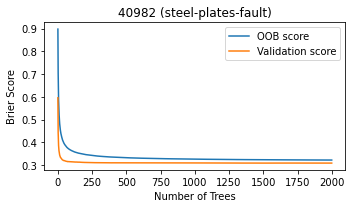

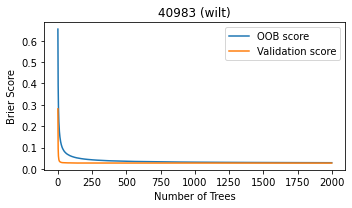

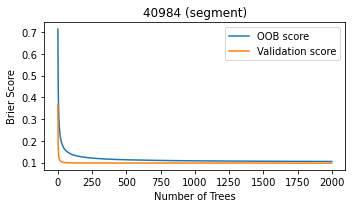

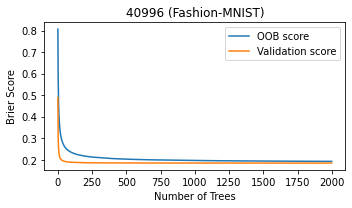

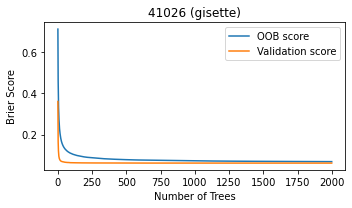

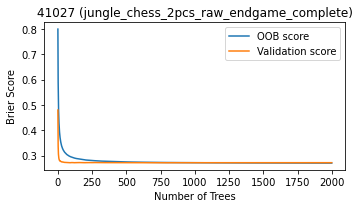

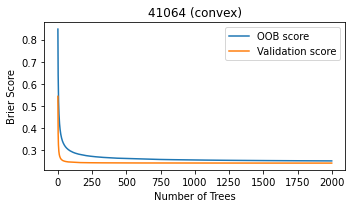

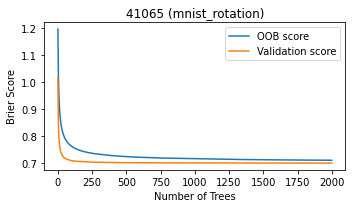

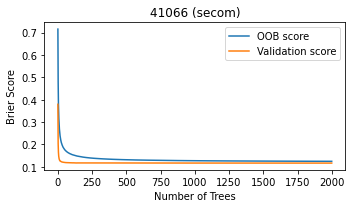

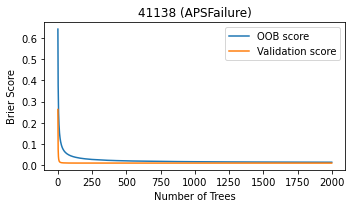

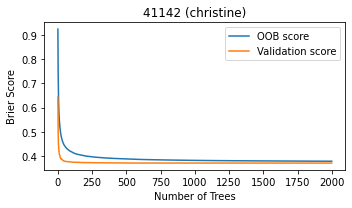

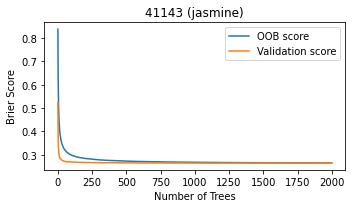

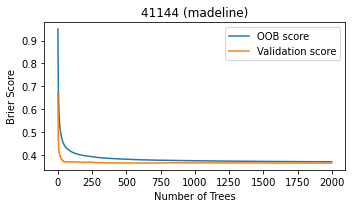

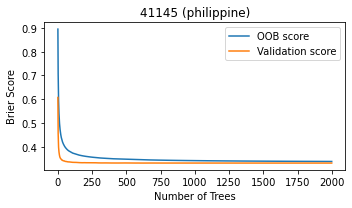

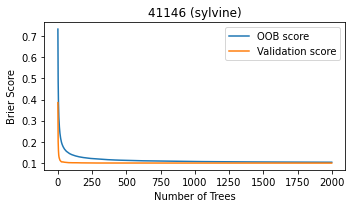

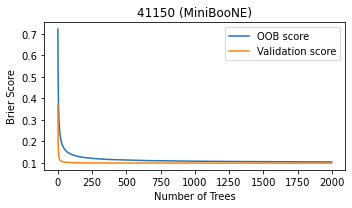

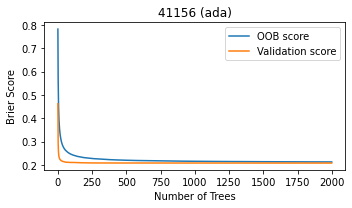

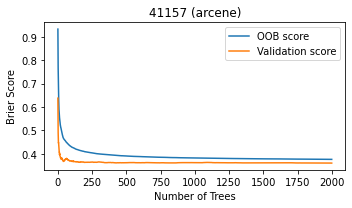

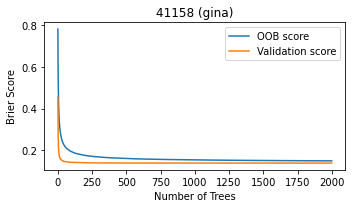

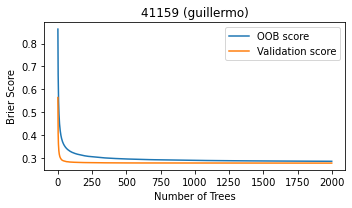

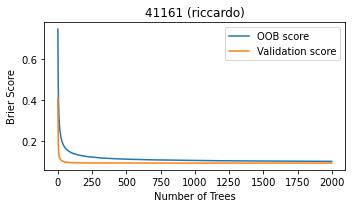

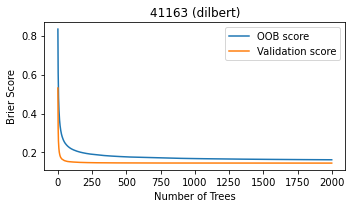

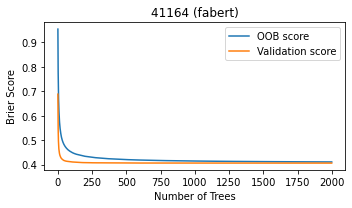

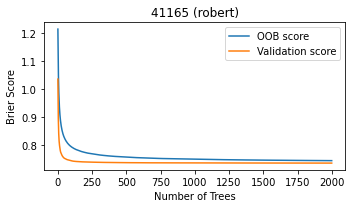

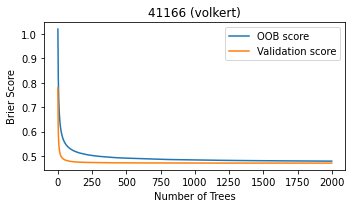

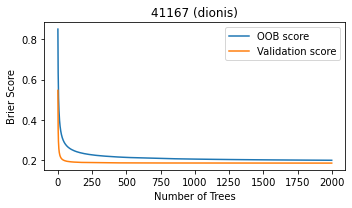

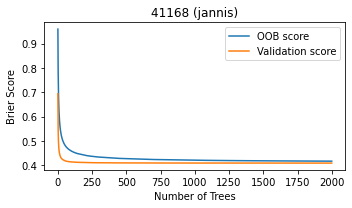

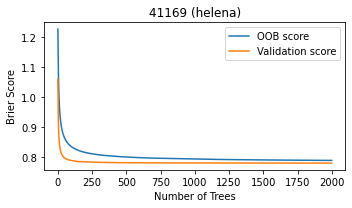

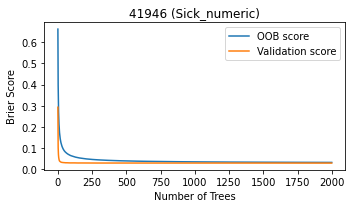

In [65]:
for openmlid, df_dataset in df_base.groupby("openmlid"):
    min_num_oob_scores = 2000#min([len(e) for e in df_dataset["scores_oob"]])
    min_num_test_scores = 2000#min([len(e) for e in df_dataset["scores_oob"]])
    mean_oob_curve = np.array([e[:min_num_oob_scores] for e in df_dataset["scores_oob"]])
    mean_test_curve = np.array([e[:min_num_test_scores] for e in df_dataset["scores_test"]])
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.plot(range(mean_oob_curve.shape[1]), np.mean(mean_oob_curve, axis = 0), label="OOB score")
    ax.plot(range(mean_test_curve.shape[1]), np.mean(mean_test_curve, axis = 0), label="Validation score")
    ax.set_xlabel("Number of Trees")
    ax.set_ylabel("Brier Score")
    ax.set_title(f"{openmlid} ({get_dataset_name(openmlid)})")
    ax.legend()
    fig.tight_layout()
    fig.savefig(f"plots/curves/{openmlid}.pdf", bbox_inches="tight")
    plt.show()

# RQ2: HPO

In [9]:
def get_results_for_number_of_trees(num_trees, suffix = ""):
    
    # pre-process argument
    if type(num_trees) == int:
        df_num_trees = df_base[["openmlid", "seed"]].copy()
        df_num_trees["num_trees"] = num_trees
    else:
        df_num_trees = num_trees
    
    df_analysis = df_base.merge(df_num_trees, on=["openmlid", "seed"])
    results = {}
    results["score_oob" + suffix] = [get_score_on_curve(curve, num_trees) for curve, num_trees in zip(df_analysis["scores_oob"], df_analysis["num_trees"])]
    results["score_test" + suffix] = [get_score_on_curve(curve, num_trees) for curve, num_trees in zip(df_analysis["scores_test"], df_analysis["num_trees"])]
    results["gap_oob" + suffix] = [score - final_score for score, final_score in zip(results["score_oob" + suffix], df_analysis["score_oob_final"])]
    results["gap_test" + suffix] = [score - final_score for score, final_score in zip(results["score_test" + suffix], df_analysis["score_test_final"])]
    results["time_train" + suffix] = [time * num_trees for time, num_trees in zip(df_analysis["train_time_per_tree_in_ms"], df_analysis["num_trees"])]    
    return pd.concat([df_num_trees.rename(columns={"num_trees": "num_trees" + suffix}), pd.DataFrame(results)], axis=1)

In [10]:
sensitivity_dfs = []
for openmlid in tqdm(sorted(pd.unique(df_base["openmlid"]))):
    try:
        df_dataset = pd.read_csv(f"sensitivity/{openmlid}.csv",)
        sensitivity_dfs.append(get_results_for_number_of_trees(df_dataset)[["openmlid", "seed", "epsilon", "w_min", "delta", "c", "bootstrap_repeats", "gap_oob", "gap_test"]].groupby(["openmlid", "epsilon", "w_min", "delta", "c", "bootstrap_repeats"]).mean().reset_index().drop(columns=["seed"]))
    except FileNotFoundError:
        print(f"No sensitivity results found for {openmlid}")
        pass
df_sensitivity = pd.concat(sensitivity_dfs)

  0%|          | 0/206 [00:00<?, ?it/s]

No sensitivity results found for 41157


## Choice of $w_{min}, \delta,$ and $c$

In [13]:
df_sensitivity_worst_case = df_sensitivity.groupby(["epsilon", "w_min", "delta", "c", "bootstrap_repeats"]).max().reset_index().drop(columns=["openmlid"])
df_sensitivity_worst_case

epsilon  w_min  delta       c  bootstrap_repeats   gap_oob  gap_test
0        0.001      2      2       1                  0  0.128400  0.030802
1        0.001      2      2       1                  2  0.128400  0.030802
2        0.001      2      2       1                  5  0.128400  0.030802
3        0.001      2      2       1                 10  0.128400  0.030802
4        0.001      2      2       1                 20  0.128400  0.030802
...        ...    ...    ...     ...                ...       ...       ...
34015    0.100   1000   1000  100000                  0  0.005313  0.000916
34016    0.100   1000   1000  100000                  2  0.005313  0.000904
34017    0.100   1000   1000  100000                  5  0.005313  0.000904
34018    0.100   1000   1000  100000                 10  0.005313  0.000904
34019    0.100   1000   1000  100000                 20  0.005313  0.000904

[34020 rows x 7 columns]

In [36]:
def dataframe_to_array(df, columns, val_column):
    domains = [sorted(pd.unique(df[c])) for c in columns]
    array = np.zeros(tuple([len(d) for d in domains]))
    array[:] = np.nan
    
    for _, row in df.iterrows():
        index = tuple([domains[i].index(row[v]) for i, v in enumerate(columns)])
        array[index] = row[val_column]
    return array, domains

def plot_hyperparameter_overview(df_results_on_dataset, bootstrap_repeats = 0, key = "oob"):
    
    D_epsilon = sorted(pd.unique(df_results_on_dataset["epsilon"]))
    D_epsilon.reverse()
    D_c = sorted(pd.unique(df_results_on_dataset["c"]))
    
    mask_no_bootstrapping = (df_results_on_dataset["bootstrap_repeats"] == bootstrap_repeats)
    
    fig, axs = plt.subplots(len(D_epsilon), len(D_c), figsize=(5.5 * len(D_c), 4.5 * len(D_epsilon)))

    if type(axs) != np.array:
        axs = np.array([axs])
        
    for (eps, c), ax in zip(it.product(D_epsilon, D_c), axs.flatten()):
        
        df = df_results_on_dataset[mask_no_bootstrapping & (df_results_on_dataset["epsilon"] == eps) & (df_results_on_dataset["c"] == c)]        
        gaps, domains = dataframe_to_array(df, ["w_min", "delta"], f"gap_{key}")
        sb.heatmap(gaps.T, cmap="coolwarm", vmin=0, vmax=2 * eps, ax = ax)
        ax.set_xticks(range(len(domains[0])))
        ax.set_xticklabels(domains[0], rotation= 90)
        ax.set_xlabel("$w_{min}$")
        ax.set_yticks(range(len(domains[1])))
        ax.set_yticklabels(domains[1], rotation=0)
        ax.set_ylabel("$delta")
        ax.set_title(f"$\\varepsilon = {eps}, c = {c}$")
    fig.tight_layout()
    return fig

  0%|          | 0/5 [00:00<?, ?it/s]

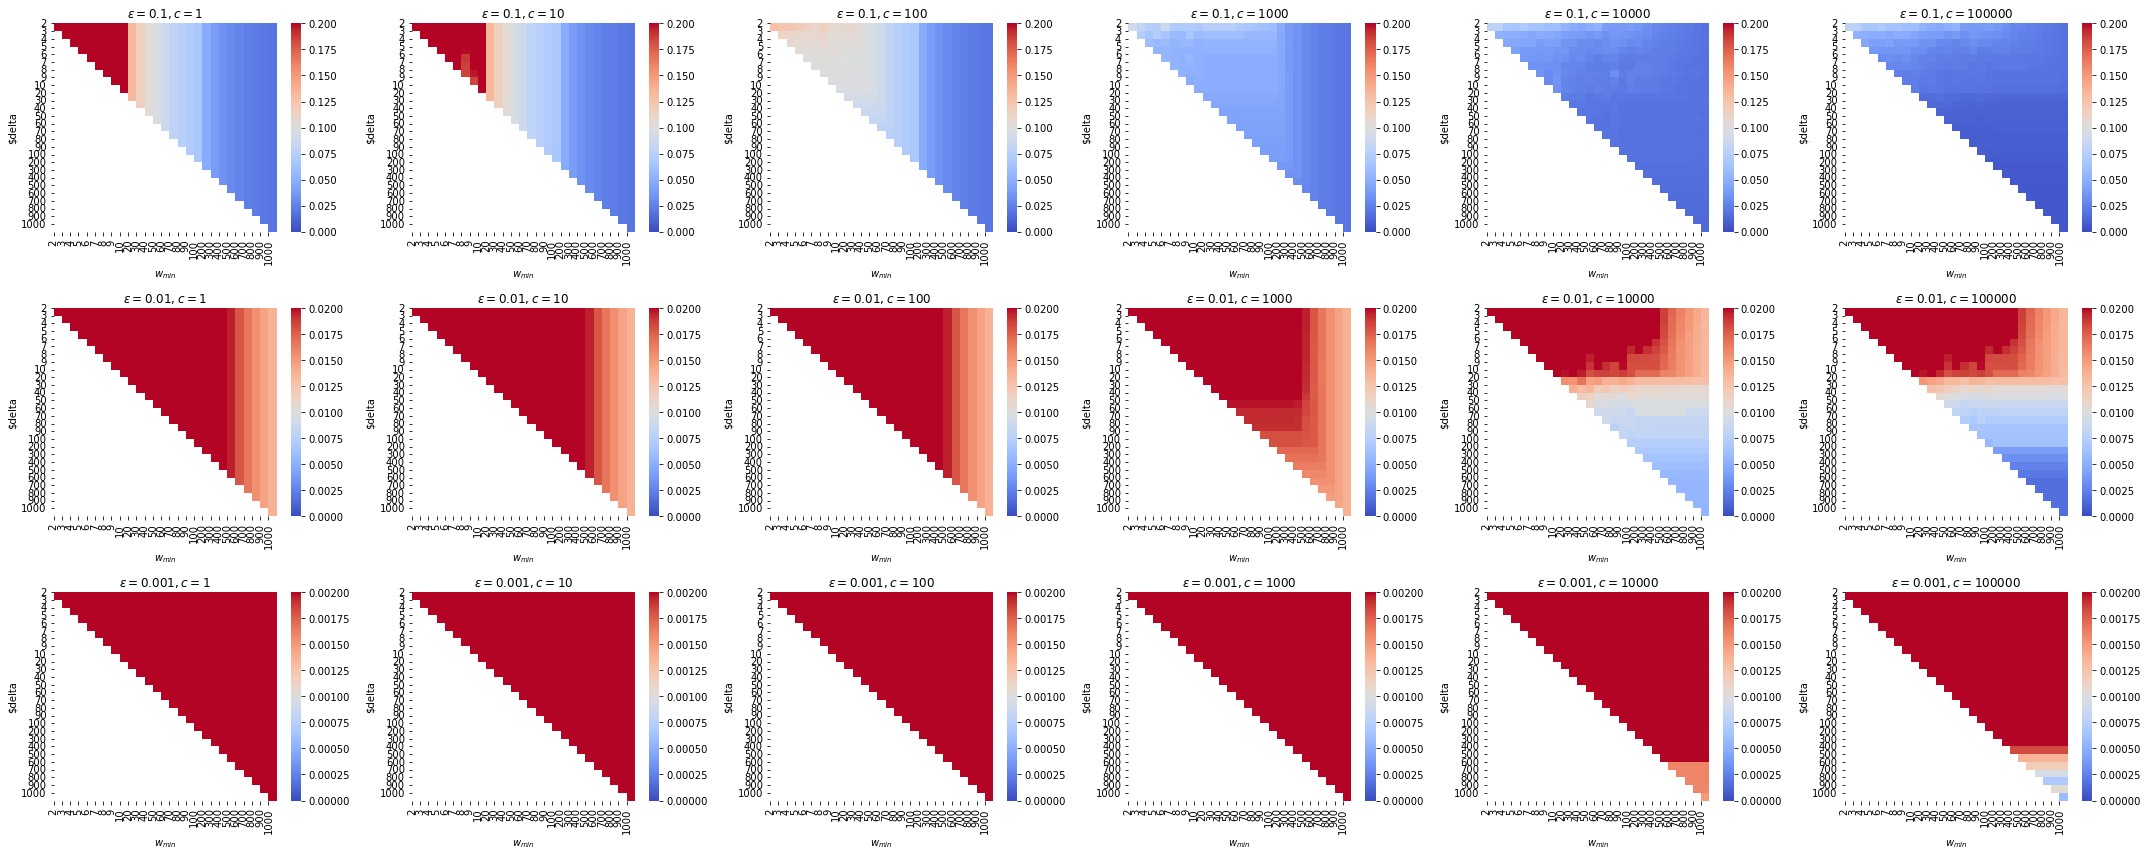

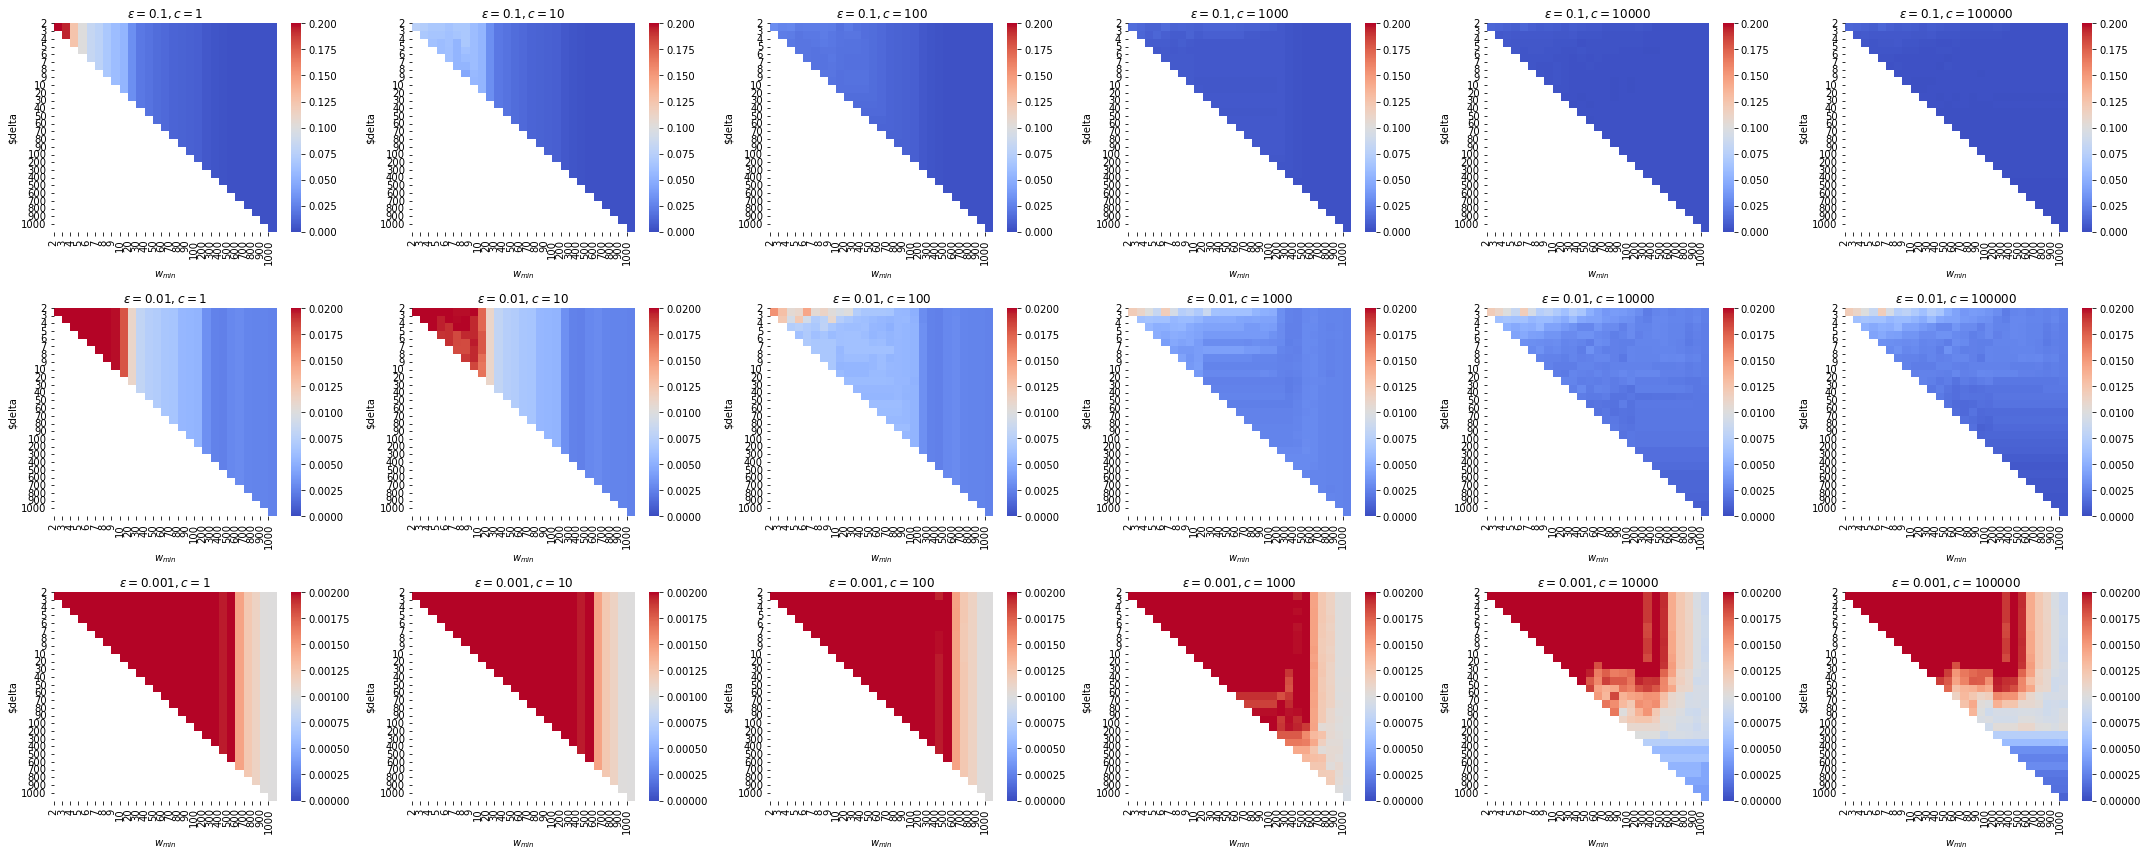

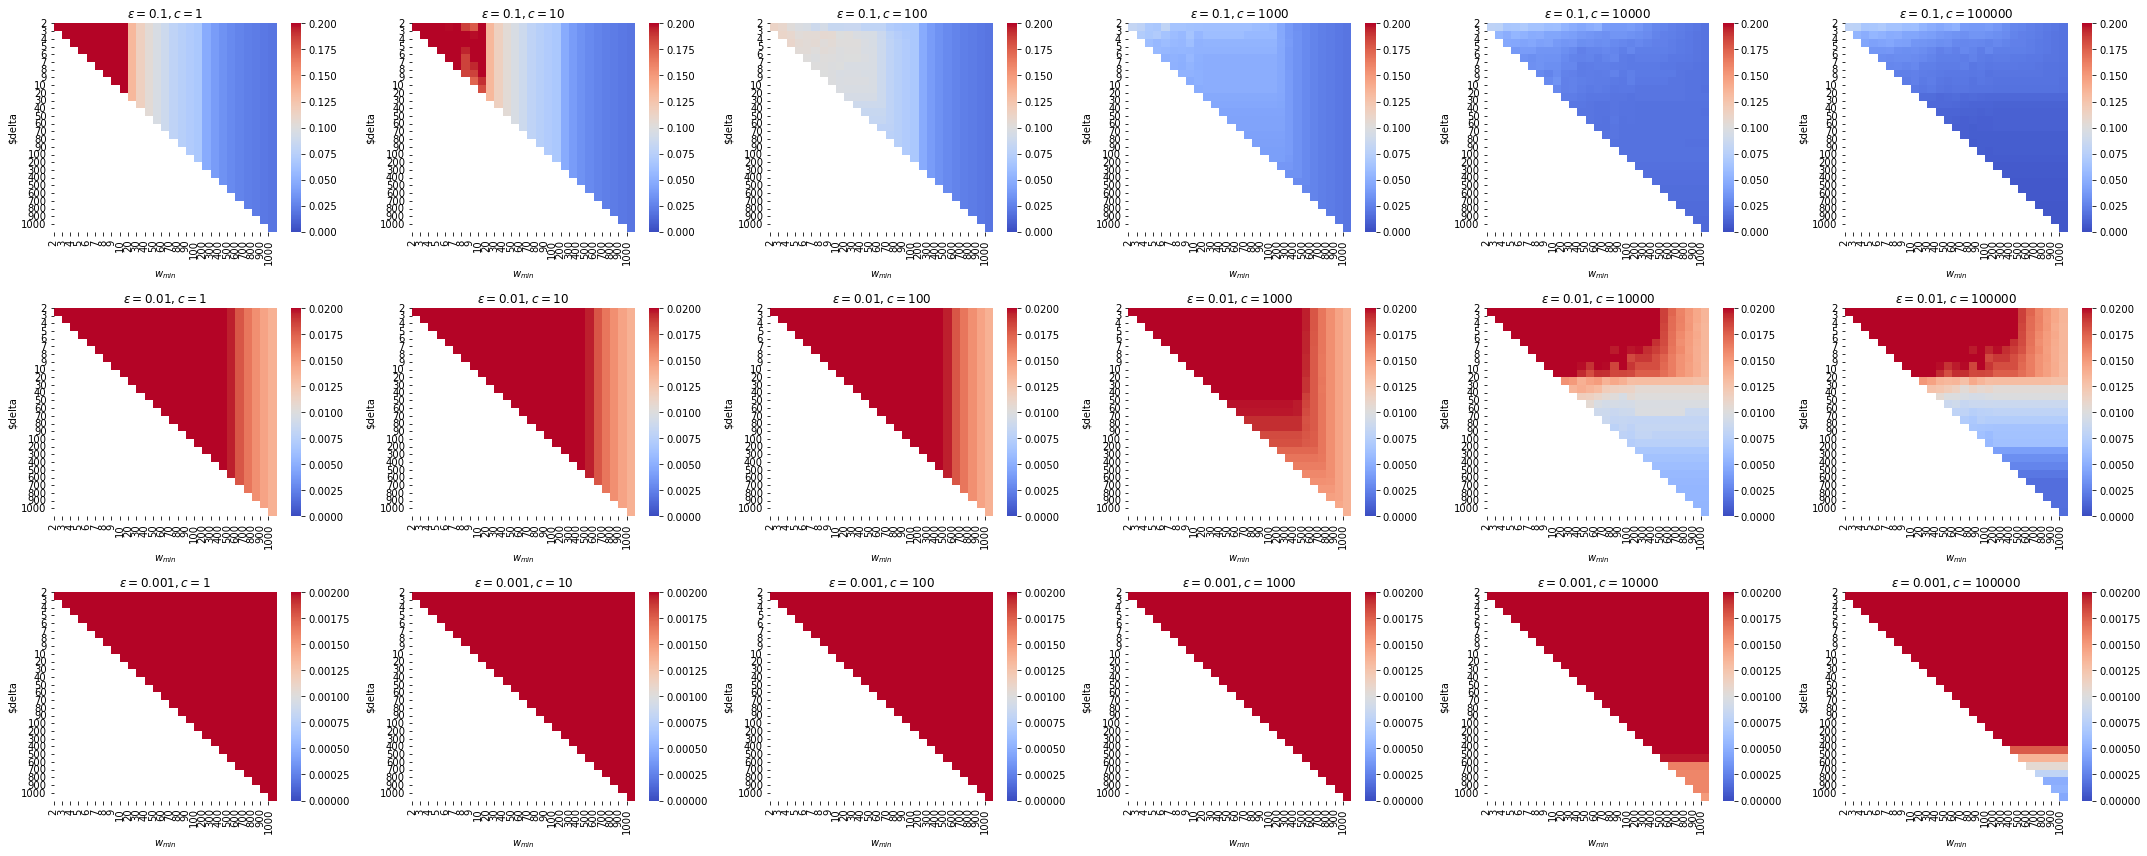

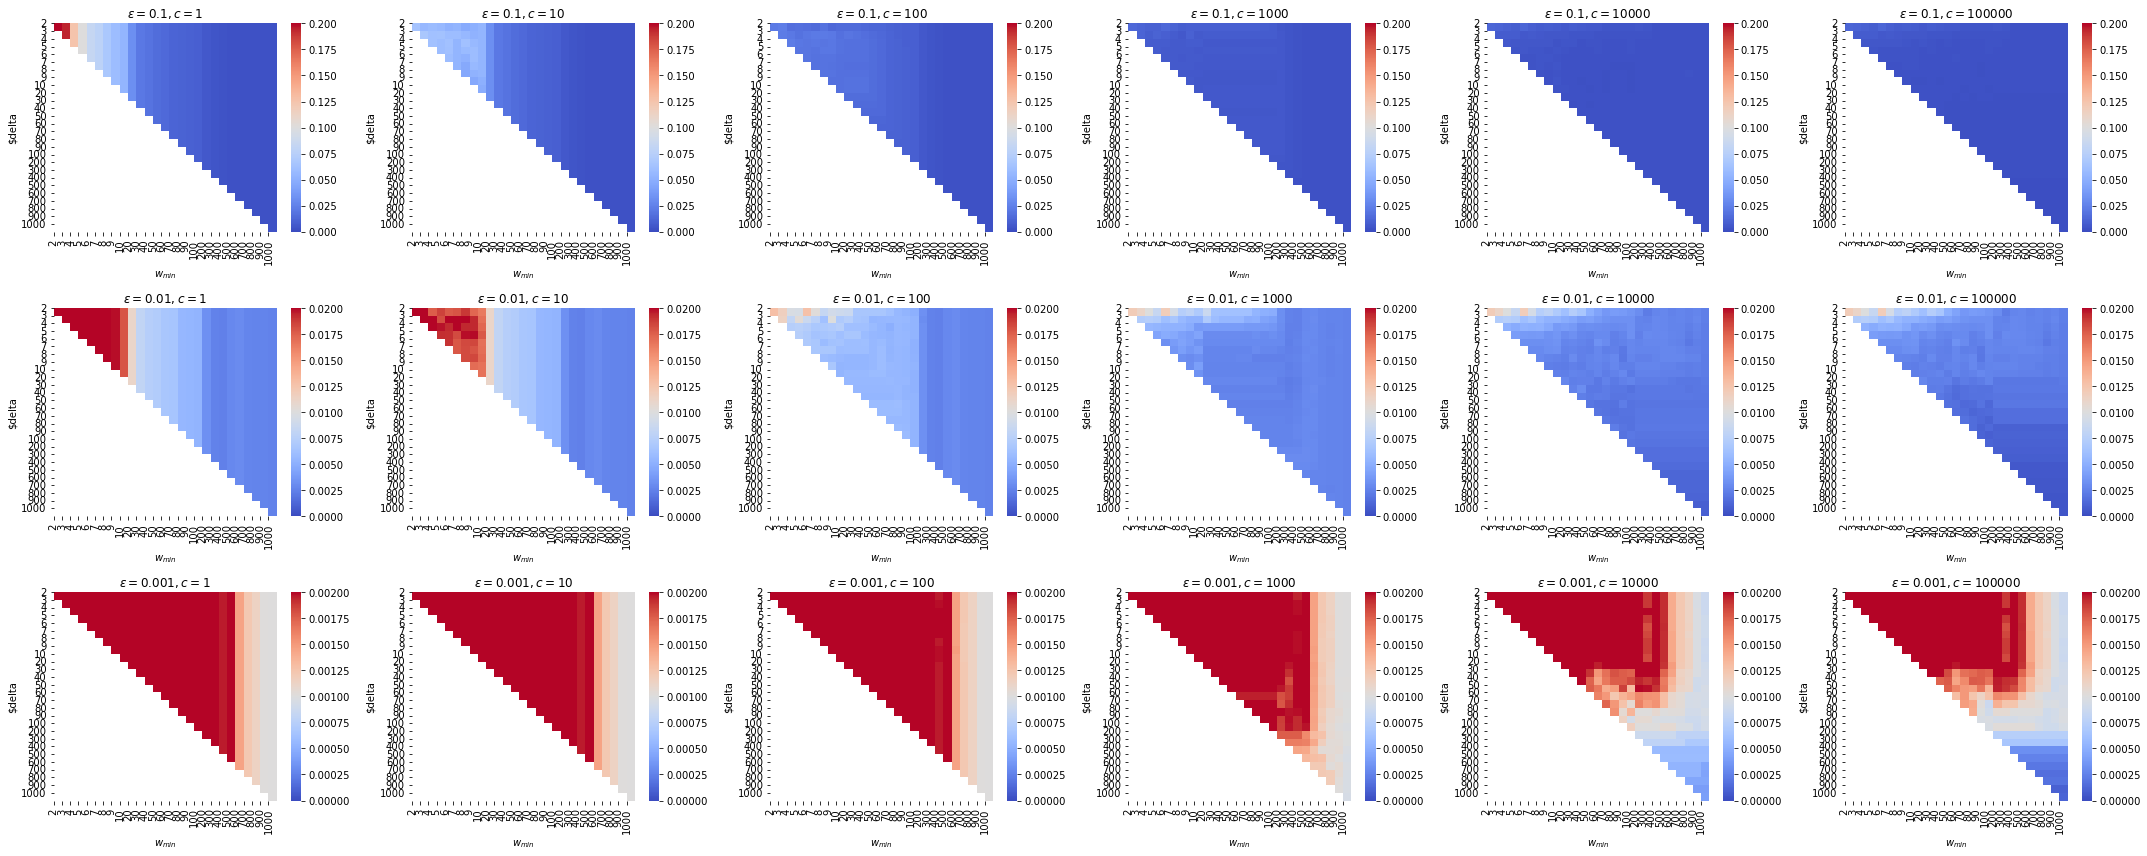

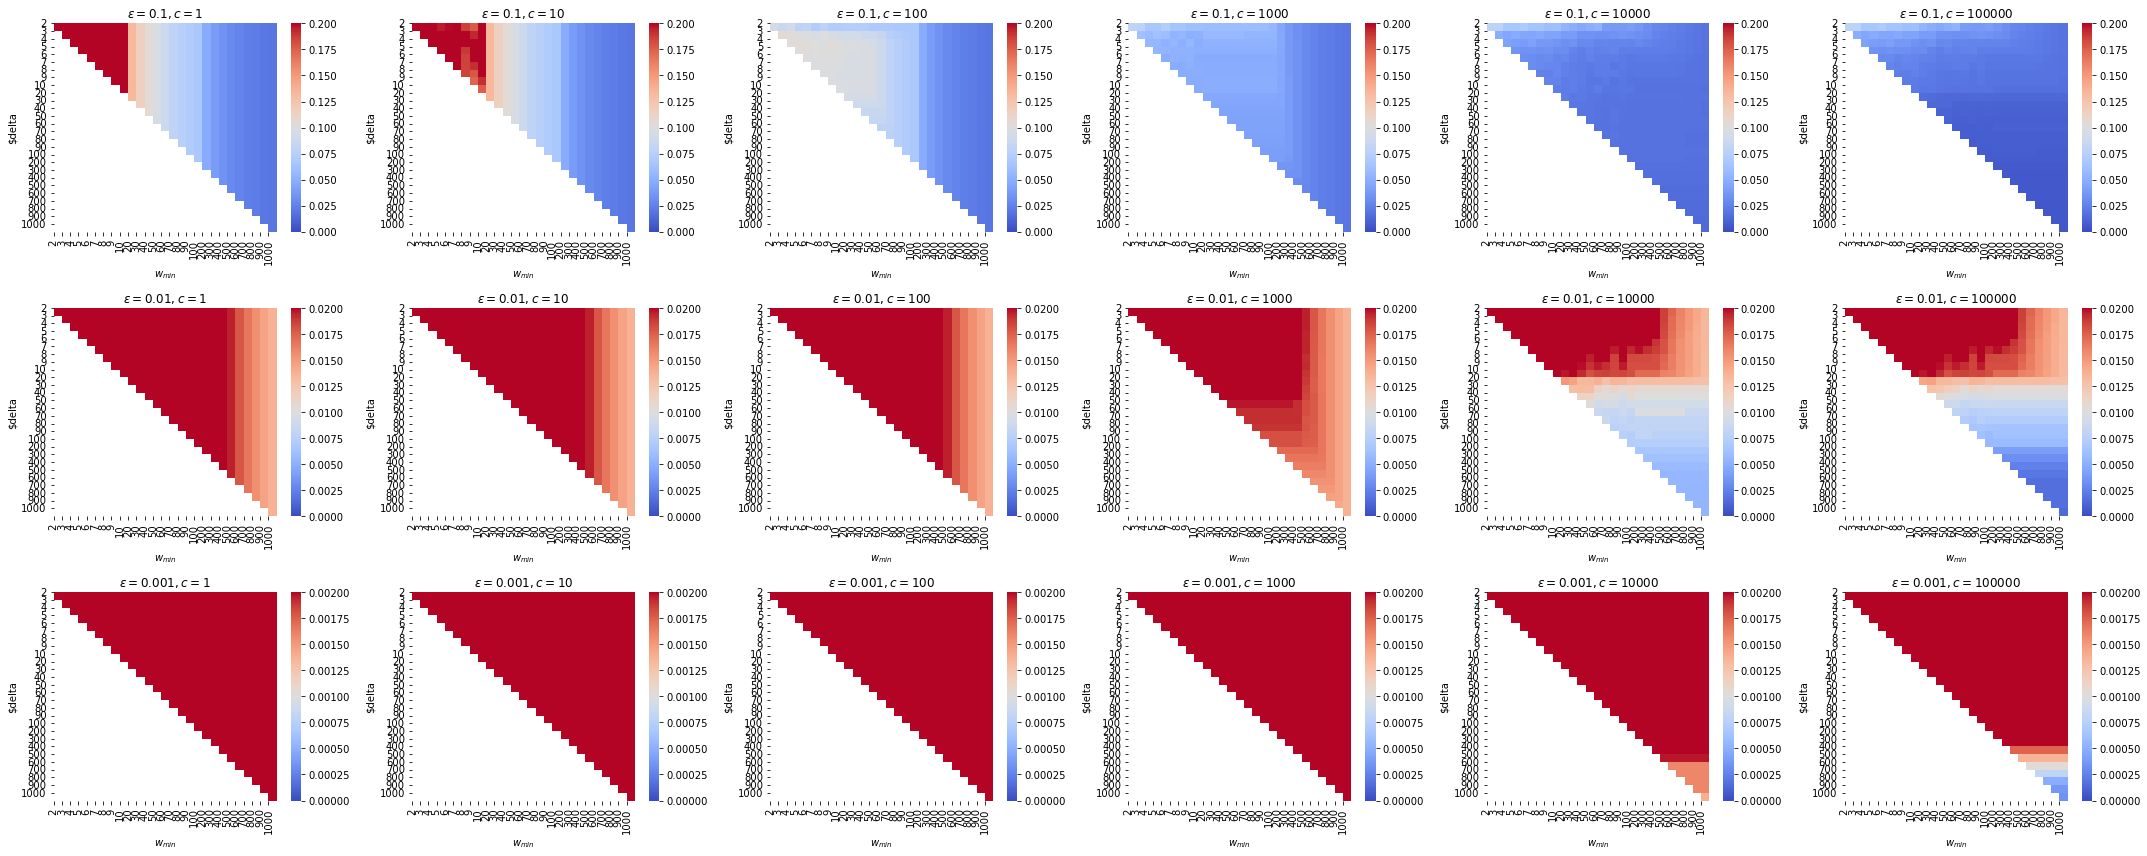

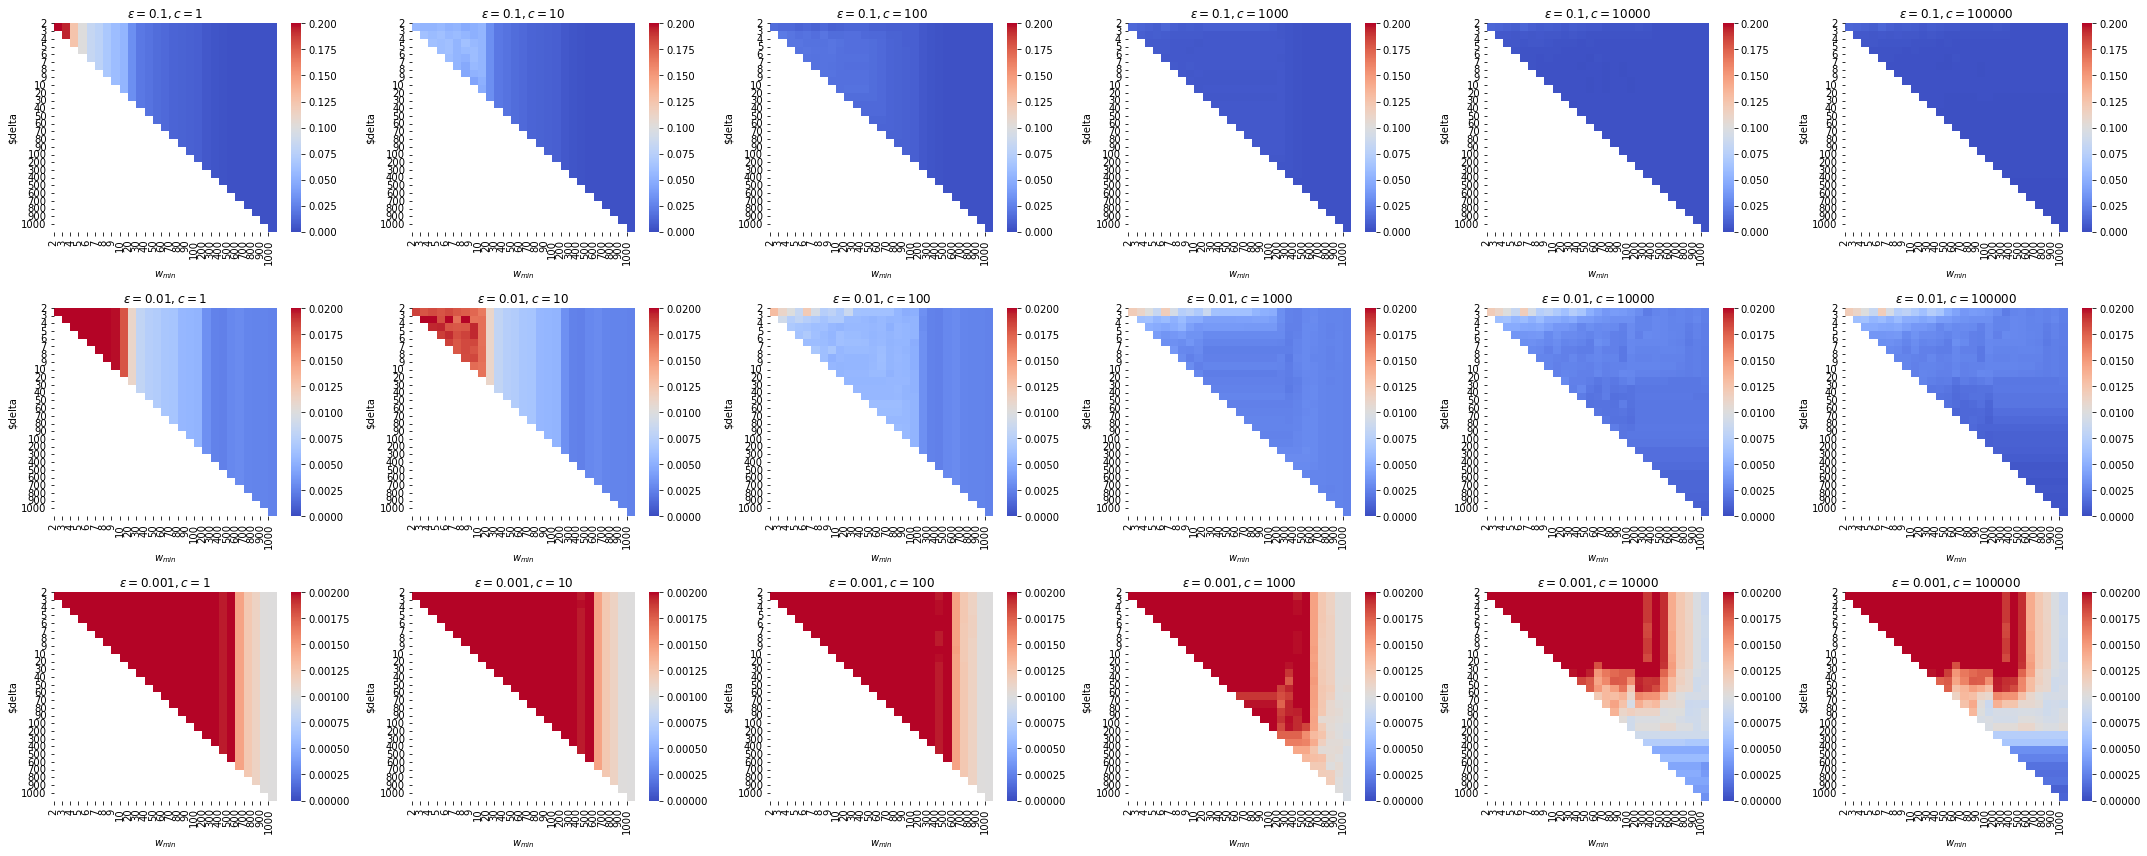

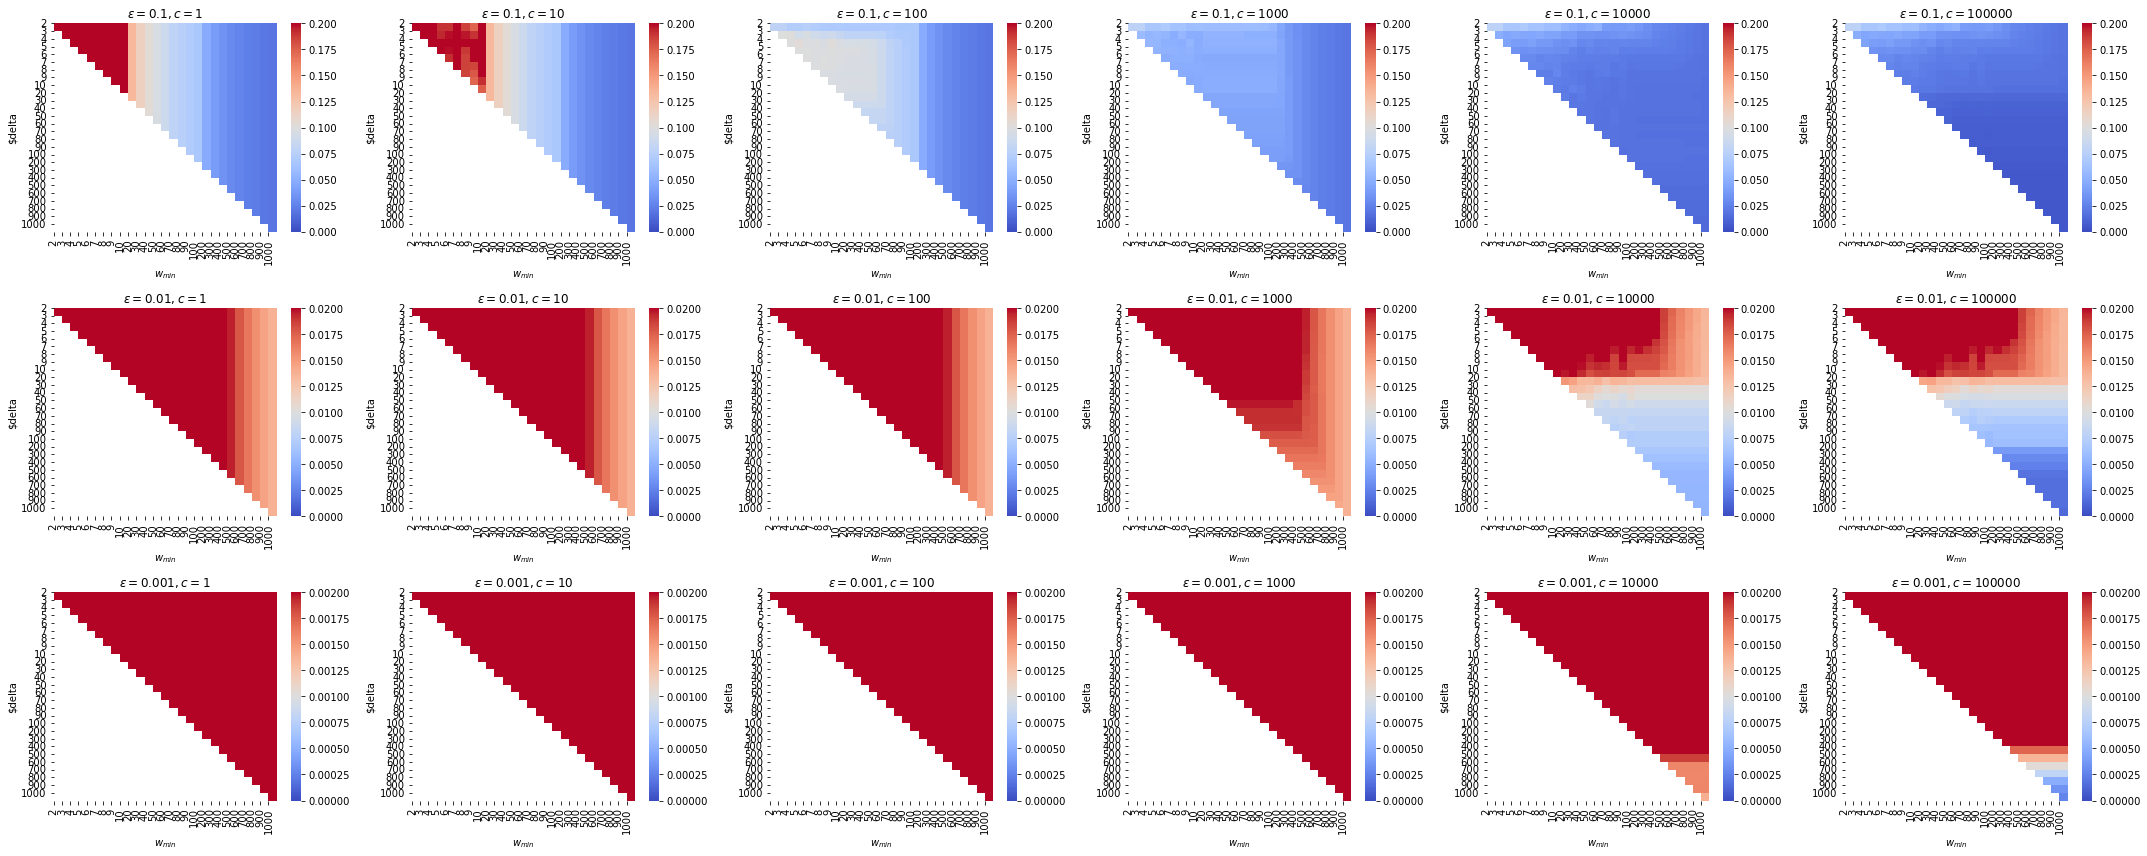

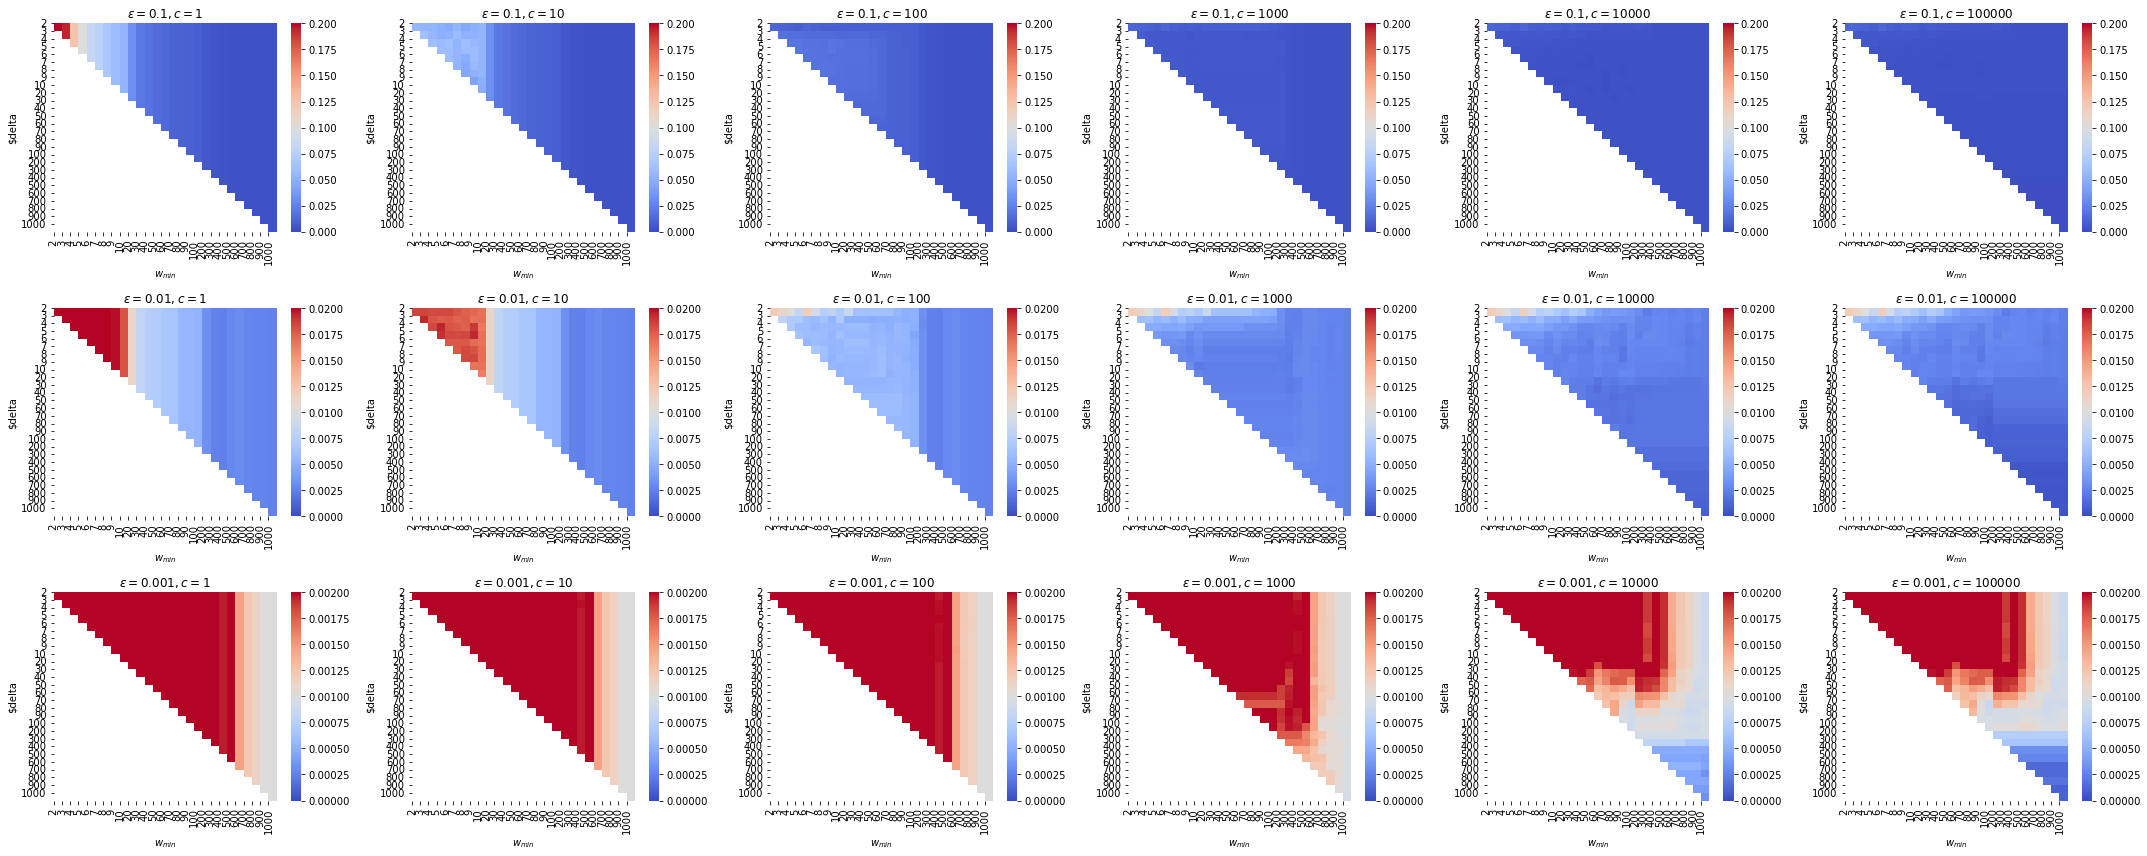

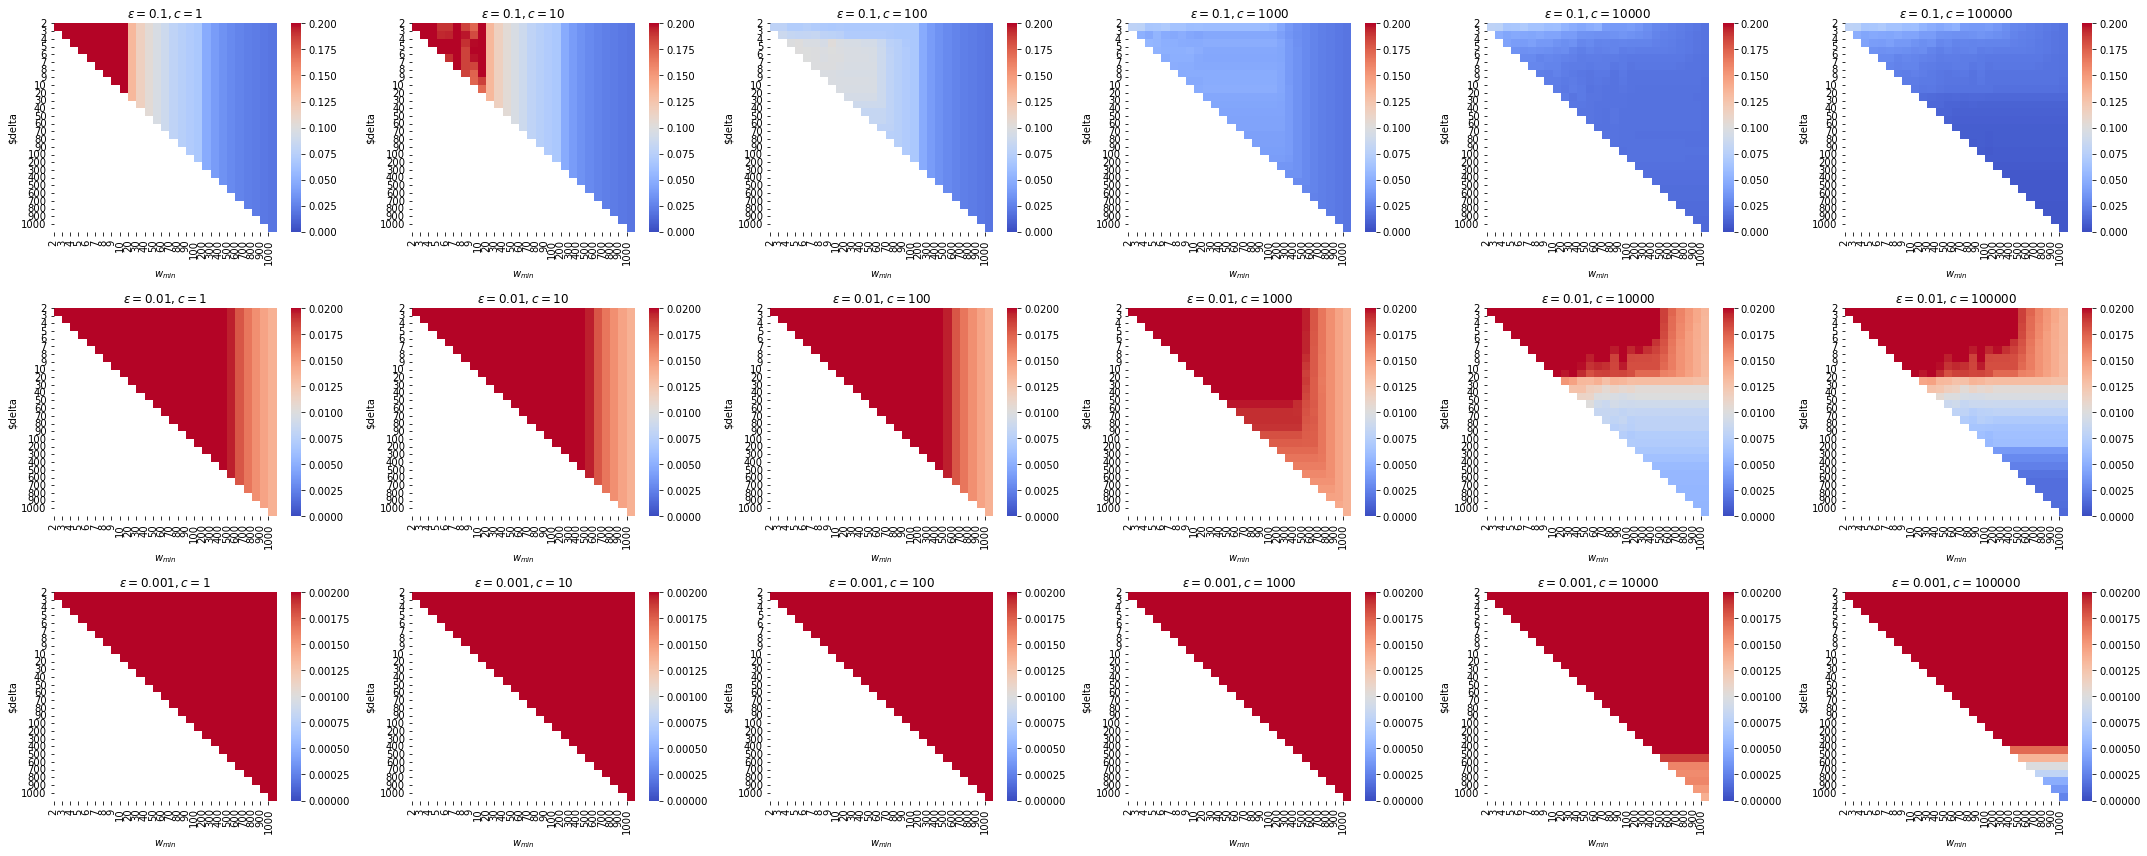

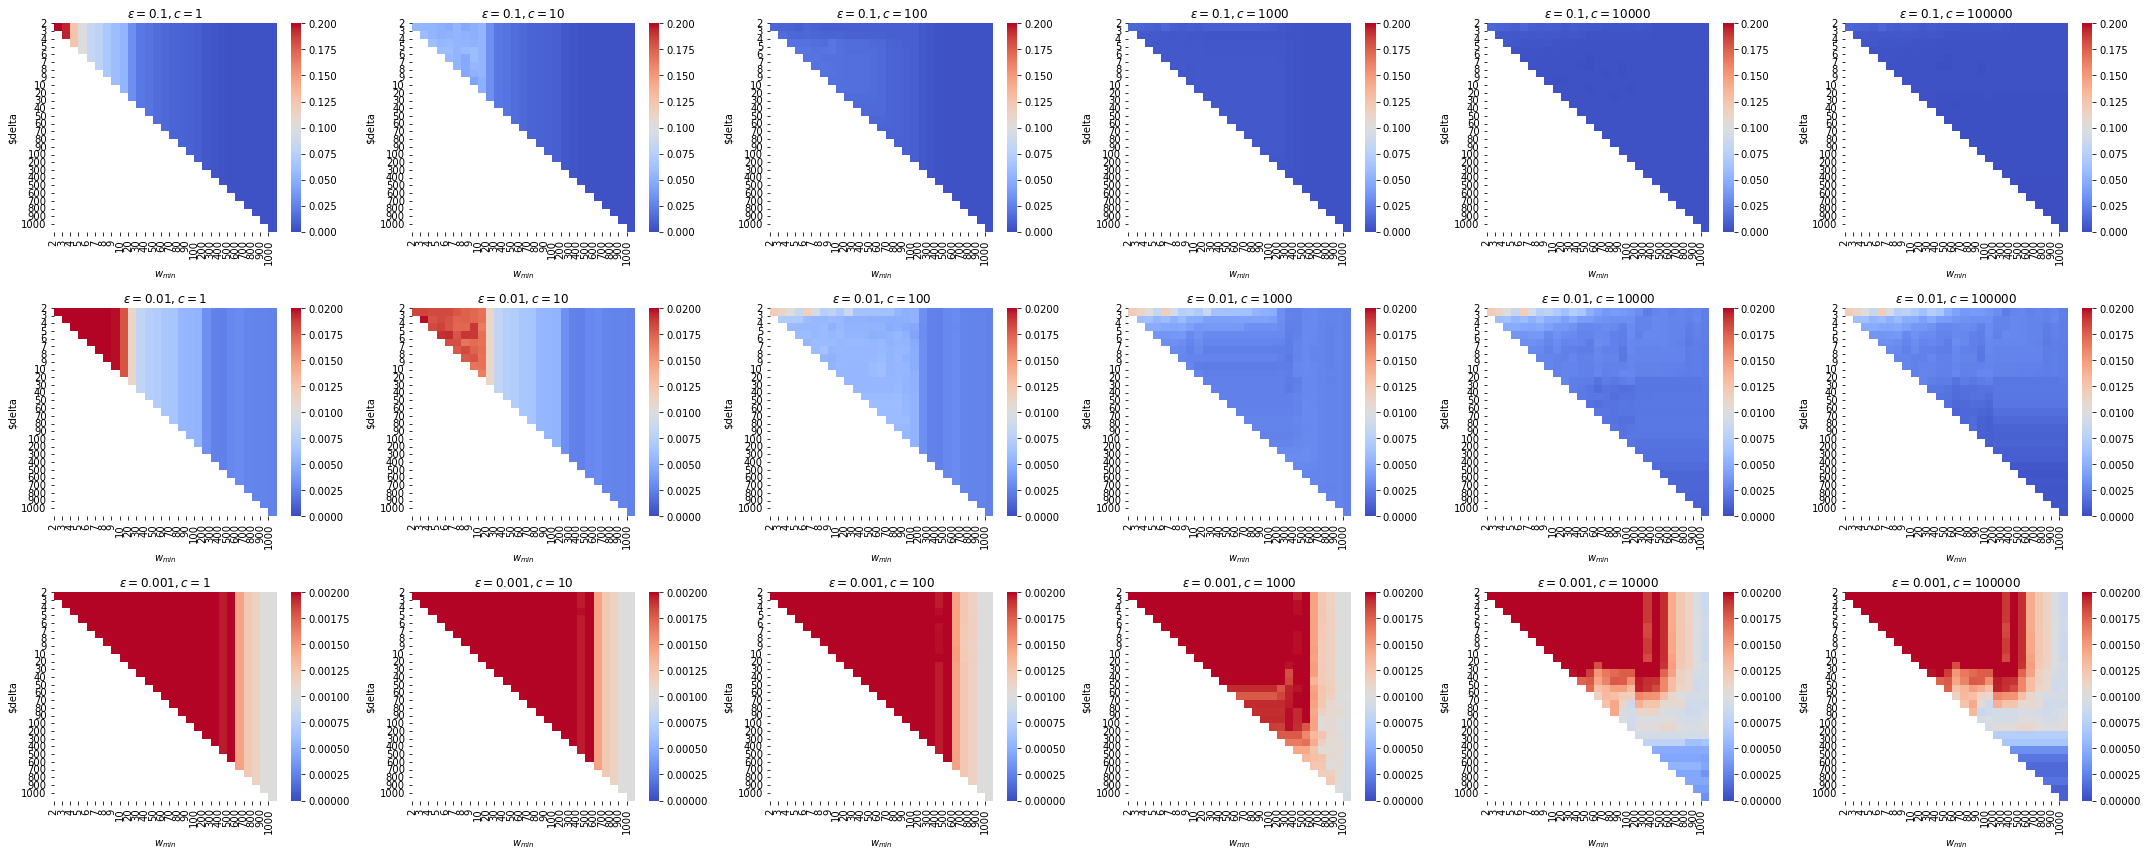

In [26]:
for bootstrap_repeats, df_bt in tqdm(df_sensitivity_worst_case.groupby("bootstrap_repeats")):
    for key in ["oob", "test"]:
        fig = plot_hyperparameter_overview(df_sensitivity_worst_case, bootstrap_repeats, key)
        fig.savefig(f"plots/sensitivity/bt_{bootstrap_repeats}_{key}.pdf", bbox_inches="tight")

  0%|          | 0/5 [00:00<?, ?it/s]

/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


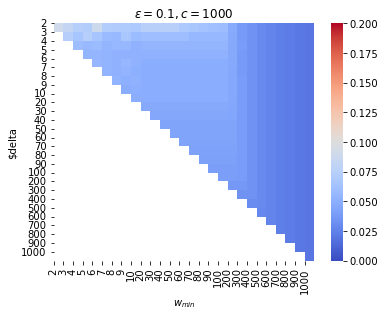

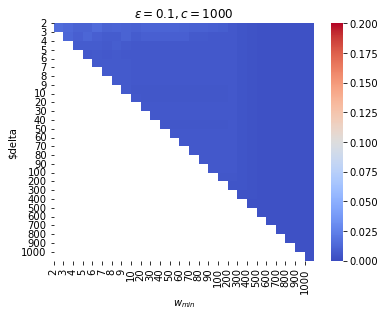

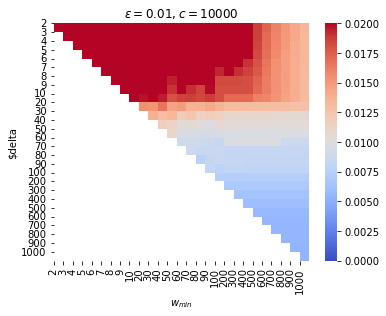

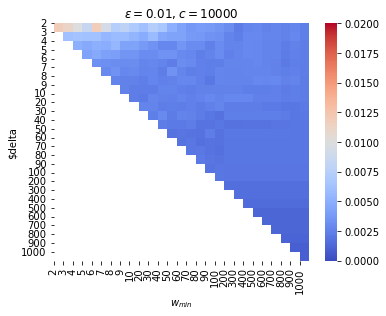

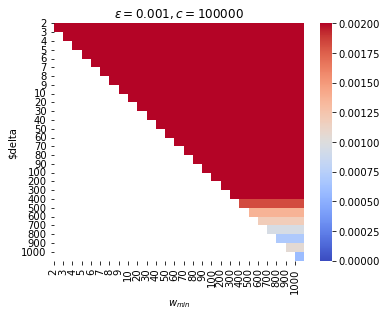

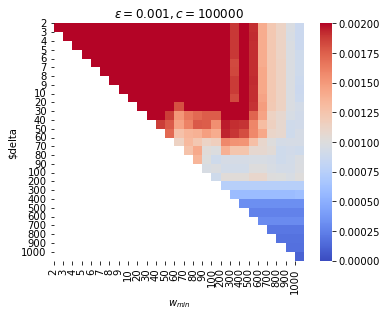

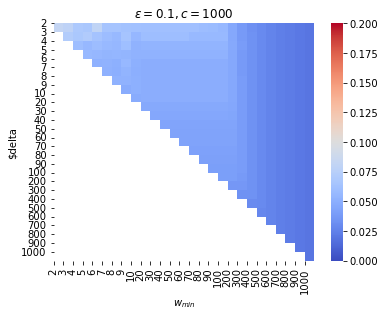

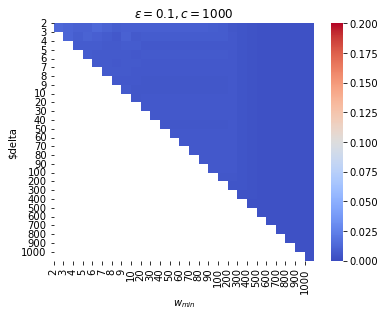

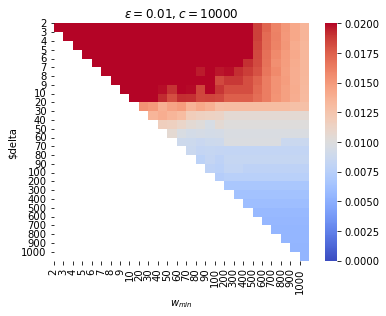

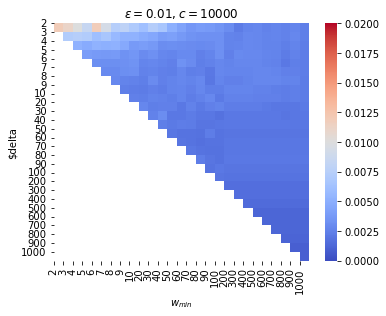

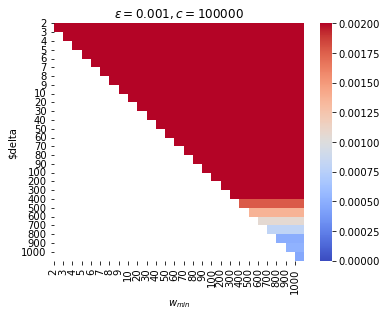

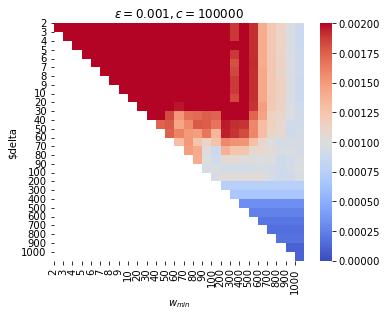

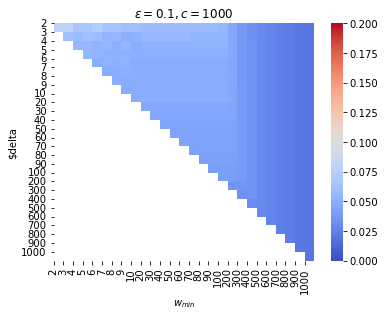

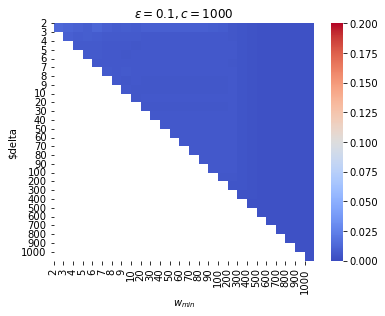

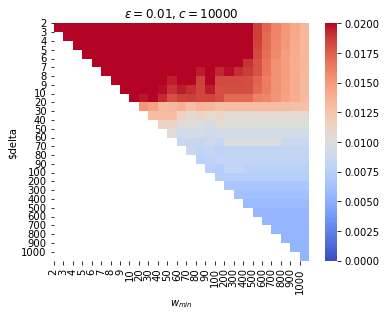

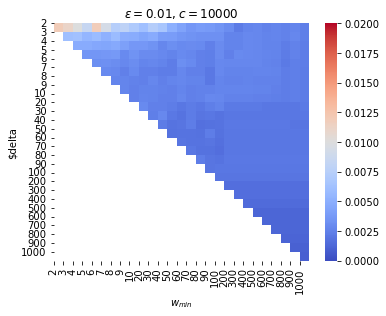

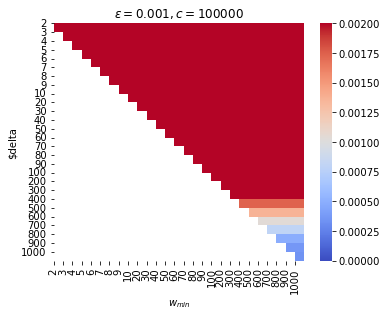

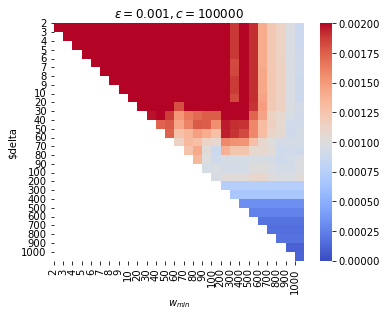

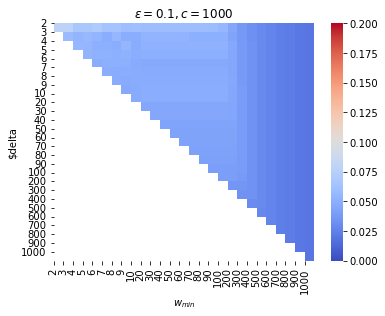

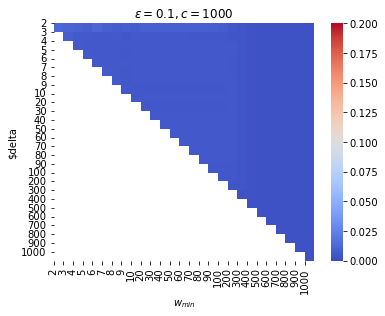

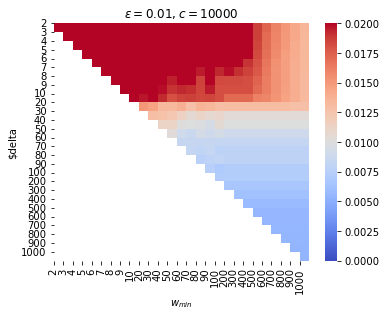

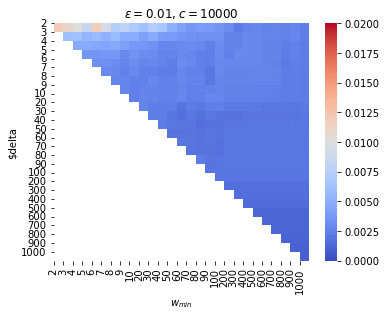

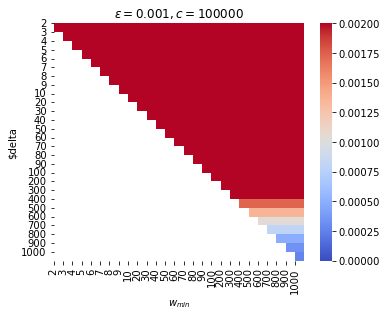

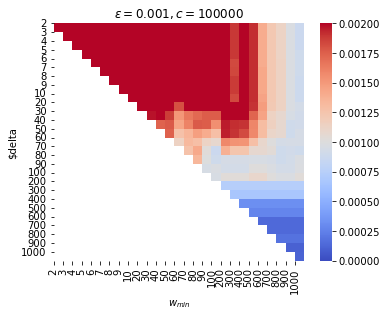

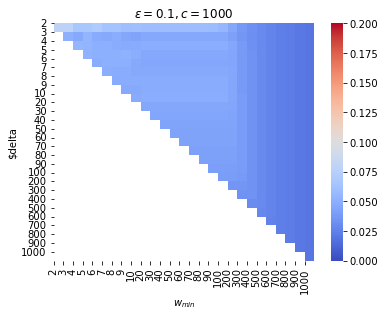

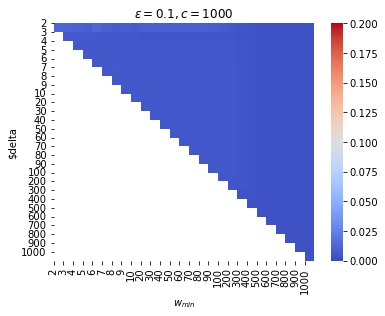

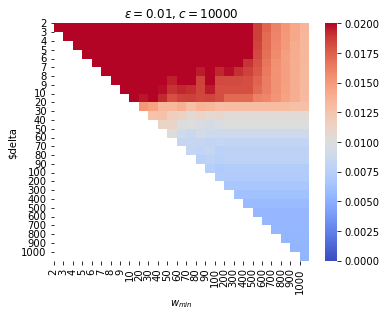

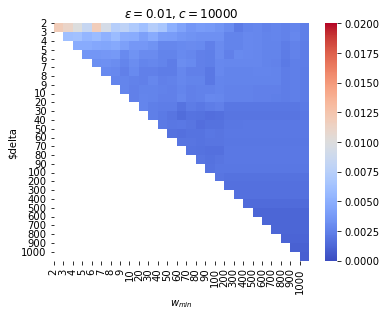

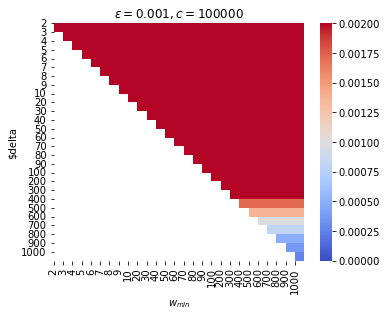

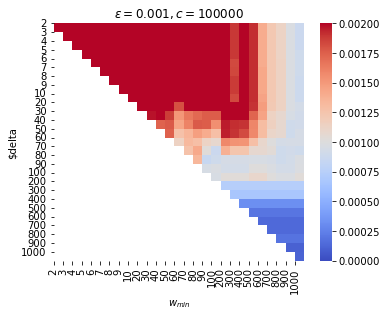

In [53]:
for bootstrap_repeats, df_bt in tqdm(df_sensitivity_worst_case.groupby("bootstrap_repeats")):
    for eps in [0.1, 0.01, 0.001]:
        c = int(100 / eps)
        for key in ["oob", "test"]:
            fig = plot_hyperparameter_overview(df_sensitivity_worst_case[(df_sensitivity_worst_case["epsilon"] == eps) & (df_sensitivity_worst_case["c"] == c)], bootstrap_repeats, key)
            fig.savefig(f"plots/sensitivity/{str(eps).replace('.', '')}_{bootstrap_repeats}_{key}.pdf", bbox_inches="tight")
plt.show()

## Choice of number $b$ of bootstrap samples

### Performance Change with Bootstrapping is Marginal

In [8]:
%%time
deltas = []
gap_ranges = []
for key, df_key in tqdm(df_sensitivity_results.groupby(["openmlid", "epsilon", "w_min", "delta", "c"])):
    deltas.append(key[-2])
    gap_ranges.append(np.max(df_key["gaps_oob_as"]) - np.min(df_key["gaps_oob_as"]))

  0%|          | 0/1394820 [00:00<?, ?it/s]

KeyboardInterrupt: 

ZeroDivisionError: division by zero

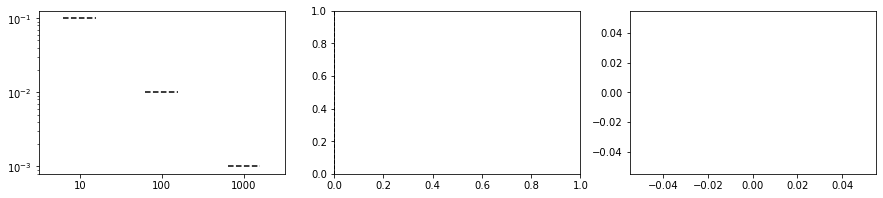

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
ax = axs[0]
boxes = []
delta_thresholds = [10, 100, 1000]
for delta in delta_thresholds:
    mask = np.array(deltas) >= delta
    boxes.append(np.array(gap_ranges)[mask])
ax.boxplot(boxes)
ax.set_xticklabels(delta_thresholds)
ax.plot([0.8, 1.2], [0.1, 0.1], color="black", linestyle="--")
ax.plot([1.8, 2.2], [0.01, 0.01], color="black", linestyle="--")
ax.plot([2.8, 3.2], [0.001, 0.001], color="black", linestyle="--")
ax.set_yscale("log")

ax = axs[1]
sb.ecdfplot(data=gap_ranges, ax = ax)
ax.axvline(0.001, color="black", linestyle="--", linewidth=1)
ax = axs[2]
ax.scatter(deltas, gap_ranges, s = 5)
print(np.count_nonzero(np.array(gap_ranges) <= 0.001) / len(gap_ranges))

## Not Using Bootstrapping hardly adds Violations
The conditional probability $\mathbb{P}(\text{violation when not using bootstrapping}~|~\text{there is no violation using 20 bootstraps})$ is less than 0.001.

In [29]:
df_no_violations_with_high_bootstrapping = df_sensitivity_results[(df_sensitivity_results["bootstrap_repeats"] == 20) & (df_sensitivity_results["gap_oob_as"] <= df_sensitivity_results["epsilon"])]

In [30]:
df_no_violations_with_high_bootstrapping

openmlid  epsilon  w_min  delta       c  bootstrap_repeats  \
6924            3    0.001    400    400   10000                 20   
6929            3    0.001    400    400  100000                 20   
7554            3    0.001    500    400   10000                 20   
7559            3    0.001    500    400  100000                 20   
7584            3    0.001    500    500   10000                 20   
...           ...      ...    ...    ...     ...                ...   
6974079     41946    0.100   1000   1000      10                 20   
6974084     41946    0.100   1000   1000     100                 20   
6974089     41946    0.100   1000   1000    1000                 20   
6974094     41946    0.100   1000   1000   10000                 20   
6974099     41946    0.100   1000   1000  100000                 20   

         num_trees  reasoning_time  reasoning_time_per_tree_in_ms  \
6924        7700.0           121.4                       1.576623   
6929        7800.0           123.4                       1.582051   
7554        7700.0           115.6                       1.501299   
7559        7800.0           117.6                       1.507692   
7584        8360.0           130.6                       1.562201   
...            ...             ...                            ...   
6974079     1021.0             5.7                       0.558276   
6974084     1021.0             5.5                       0.538688   
6974089     1021.0             5.5                       0.538688   
6974094     1300.0             8.1                       0.623077   
6974099     3140.0            50.6                       1.611465   

         score_oob_as  score_test_as  gap_oob_as   gap_test_as  
6924           0.0304         0.0270    0.000719 -1.040834e-17  
6929           0.0304         0.0270    0.000719 -1.040834e-17  
7554           0.0304         0.0270    0.000719 -1.040834e-17  
7559           0.0304         0.0270    0.000719 -1.040834e-17  
7584           0.0303         0.0270    0.000619 -1.040834e-17  
...               ...            ...         ...           ...  
6974079        0.0358         0.0303    0.005400  9.898990e-05  
6974084        0.0358         0.0303    0.005400  9.898990e-05  
6974089        0.0358         0.0303    0.005400  9.898990e-05  
6974094        0.0347         0.0301    0.004300 -1.010101e-04  
6974099        0.0321         0.0302    0.001700 -1.010101e-06  

[710635 rows x 13 columns]

In [31]:
df_no_bootstrapping = df_sensitivity_results[df_sensitivity_results["bootstrap_repeats"] == 0]
df_no_bootstrapping

openmlid  epsilon  w_min  delta       c  bootstrap_repeats  \
0               3    0.001      2      2       1                  0   
5               3    0.001      2      2      10                  0   
10              3    0.001      2      2     100                  0   
15              3    0.001      2      2    1000                  0   
20              3    0.001      2      2   10000                  0   
...           ...      ...    ...    ...     ...                ...   
6974075     41946    0.100   1000   1000      10                  0   
6974080     41946    0.100   1000   1000     100                  0   
6974085     41946    0.100   1000   1000    1000                  0   
6974090     41946    0.100   1000   1000   10000                  0   
6974095     41946    0.100   1000   1000  100000                  0   

         num_trees  reasoning_time  reasoning_time_per_tree_in_ms  \
0             46.2             1.4                       3.030303   
5            123.4             9.4                       7.617504   
10           142.8            11.4                       7.983193   
15           142.8            11.4                       7.983193   
20           142.8            11.6                       8.123249   
...            ...             ...                            ...   
6974075     1021.0             3.8                       0.372184   
6974080     1021.0             3.8                       0.372184   
6974085     1021.0             3.7                       0.362390   
6974090     1300.0             2.2                       0.169231   
6974095     3140.0             8.6                       0.273885   

         score_oob_as  score_test_as  gap_oob_as  gap_test_as  
0              0.0964         0.0301    0.066719     0.003100  
5              0.0638         0.0278    0.034119     0.000800  
10             0.0606         0.0276    0.030919     0.000600  
15             0.0606         0.0276    0.030919     0.000600  
20             0.0606         0.0276    0.030919     0.000600  
...               ...            ...         ...          ...  
6974075        0.0358         0.0303    0.005400     0.000099  
6974080        0.0358         0.0303    0.005400     0.000099  
6974085        0.0358         0.0303    0.005400     0.000099  
6974090        0.0347         0.0301    0.004300    -0.000101  
6974095        0.0321         0.0302    0.001700    -0.000001  

[1394820 rows x 13 columns]

In [32]:
df_no_bootstrapping_relevant_configs = df_no_bootstrapping.merge(df_no_violations_with_high_bootstrapping[["openmlid", "epsilon", "w_min", "delta", "c"]], on=["openmlid", "epsilon", "w_min", "delta", "c"])
df_no_bootstrapping_relevant_configs

openmlid  epsilon  w_min  delta       c  bootstrap_repeats  num_trees  \
0              3    0.001    400    400   10000                  0     7400.0   
1              3    0.001    400    400  100000                  0     7800.0   
2              3    0.001    500    400   10000                  0     7400.0   
3              3    0.001    500    400  100000                  0     7800.0   
4              3    0.001    500    500   10000                  0     8140.0   
...          ...      ...    ...    ...     ...                ...        ...   
710630     41946    0.100   1000   1000      10                  0     1021.0   
710631     41946    0.100   1000   1000     100                  0     1021.0   
710632     41946    0.100   1000   1000    1000                  0     1021.0   
710633     41946    0.100   1000   1000   10000                  0     1300.0   
710634     41946    0.100   1000   1000  100000                  0     3140.0   

        reasoning_time  reasoning_time_per_tree_in_ms  score_oob_as  \
0                 19.8                       0.267568        0.0305   
1                 21.0                       0.269231        0.0304   
2                 19.0                       0.256757        0.0305   
3                 20.6                       0.264103        0.0304   
4                 22.6                       0.277641        0.0303   
...                ...                            ...           ...   
710630             3.8                       0.372184        0.0358   
710631             3.8                       0.372184        0.0358   
710632             3.7                       0.362390        0.0358   
710633             2.2                       0.169231        0.0347   
710634             8.6                       0.273885        0.0321   

        score_test_as  gap_oob_as   gap_test_as  
0              0.0270    0.000819 -1.040834e-17  
1              0.0270    0.000719 -1.040834e-17  
2              0.0270    0.000819 -1.040834e-17  
3              0.0270    0.000719 -1.040834e-17  
4              0.0271    0.000619  1.000000e-04  
...               ...         ...           ...  
710630         0.0303    0.005400  9.898990e-05  
710631         0.0303    0.005400  9.898990e-05  
710632         0.0303    0.005400  9.898990e-05  
710633         0.0301    0.004300 -1.010101e-04  
710634         0.0302    0.001700 -1.010101e-06  

[710635 rows x 13 columns]

In [33]:
cases_where_not_using_bootstrapping_leads_to_violations = df_no_bootstrapping_relevant_configs["gap_oob_as"] > df_no_bootstrapping_relevant_configs["epsilon"]
df_no_bootstrapping_relevant_configs[cases_where_not_using_bootstrapping_leads_to_violations]

openmlid  epsilon  w_min  delta     c  bootstrap_repeats  num_trees  \
64             3     0.01     30     30  1000                  0     666.00   
77             3     0.01     40     30  1000                  0     666.00   
93             3     0.01     50     30  1000                  0     666.00   
112            3     0.01     60     30  1000                  0     666.00   
130            3     0.01     70     30  1000                  0     666.00   
...          ...      ...    ...    ...   ...                ...        ...   
699184     41168     0.01    500     80  1000                  0     867.50   
699187     41168     0.01    500     90  1000                  0     873.75   
708566     41946     0.10      9      2    10                  0      16.00   
708571     41946     0.10      9      3    10                  0      16.00   
708596     41946     0.10      9      9    10                  0      16.00   

        reasoning_time  reasoning_time_per_tree_in_ms  score_oob_as  \
64               7.600                       1.141141        0.0400   
77               7.600                       1.141141        0.0400   
93               7.400                       1.111111        0.0400   
112              7.000                       1.051051        0.0400   
130              6.800                       1.021021        0.0400   
...                ...                            ...           ...   
699184           4.125                       0.475504        0.4220   
699187           4.125                       0.472103        0.4220   
708566           0.000                       0.000000        0.1547   
708571           0.000                       0.000000        0.1547   
708596           0.000                       0.000000        0.1547   

        score_test_as  gap_oob_as  gap_test_as  
64             0.0273    0.010319     0.000300  
77             0.0273    0.010319     0.000300  
93             0.0273    0.010319     0.000300  
112            0.0273    0.010319     0.000300  
130            0.0273    0.010319     0.000300  
...               ...         ...          ...  
699184         0.4094    0.010100     0.000500  
699187         0.4094    0.010100     0.000500  
708566         0.0381    0.124300     0.007899  
708571         0.0381    0.124300     0.007899  
708596         0.0381    0.124300     0.007899  

[2888 rows x 13 columns]

In [34]:
violations_wo_bootstrapping = np.count_nonzero(cases_where_not_using_bootstrapping_leads_to_violations)
print(f"{violations_wo_bootstrapping}/{len(df_no_bootstrapping)} ({np.round(100 * violations_wo_bootstrapping / len(df_no_bootstrapping), 2)}%) observations show a violation of epsilon if no bootstrapping is being used.")

2888/1394820 (0.21%) observations show a violation of epsilon if no bootstrapping is being used.


## Bootstrapping Slows Down

In [14]:
#fig, ax = plt.subplots()
runtime_increments = {i: [] for i in [2, 5, 10, 20]}
for openmlid, df_dataset in df_sensitivity_results.groupby("openmlid"):
    mean_time_wo_bt = df_dataset[df_dataset["bootstrap_repeats"] == 0]["reasoning_time"].mean()
    #print(openmlid, np.round(mean_time_wo_bt))
    for repeats, df_repeats in df_dataset.groupby("bootstrap_repeats"):
        if repeats != 0:
            mean_time = df_repeats["reasoning_time"].mean()
            #print("\t", repeats, np.round(mean_time), np.round(mean_time / mean_time_wo_bt, 2))
            runtime_increments[repeats].append(mean_time / mean_time_wo_bt)
#ax.scatter(df_hpo_reduced["bootstrap_repeats"], df_hpo_reduced["reasoning_time"])

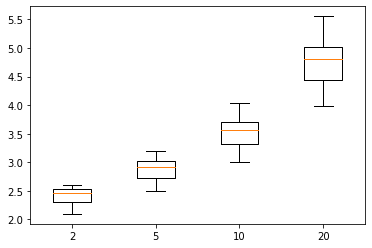

In [15]:
fig, ax = plt.subplots()
keys = sorted(runtime_increments.keys())
ax.boxplot([runtime_increments[k] for k in keys])
ax.set_xticklabels(keys)
plt.show()

## Now get the Dataframe with all the results from the sensitivity analysis only on the chosen one

In [7]:
pd.read_csv("sensitivity/60.csv")

openmlid  seed  epsilon  w_min  delta       c  bootstrap_repeats  \
0             60     0    0.001   1000   1000  100000                 20   
1             60     0    0.001   1000   1000  100000                 10   
2             60     0    0.001   1000   1000  100000                  5   
3             60     0    0.001   1000   1000  100000                  2   
4             60     0    0.001   1000   1000  100000                  0   
...          ...   ...      ...    ...    ...     ...                ...   
306175        60     9    0.100      2      2       1                 20   
306176        60     9    0.100      2      2       1                 10   
306177        60     9    0.100      2      2       1                  5   
306178        60     9    0.100      2      2       1                  2   
306179        60     9    0.100      2      2       1                  0   

        num_trees  reasoning_time  
0           17200           302.0  
1           17200           220.0  
2           17200           180.0  
3           17200           154.0  
4           17200            69.0  
...           ...             ...  
306175          3             2.0  
306176          3             1.0  
306177          3             1.0  
306178          3             1.0  
306179          3             0.0  

[306180 rows x 9 columns]

# RQ3: Computational Overhead

In [20]:
df_sensitivity_hpo = None
for openmlid in tqdm(sorted(pd.unique(df_base["openmlid"]))):
    try:
        df_dataset = pd.read_csv(f"sensitivity/{openmlid}.csv",)
        mask = (df_dataset["w_min"] == df_dataset["delta"]) & (df_dataset["delta"] == df_dataset["c"] / 100) & (df_dataset["c"] == 100 / df_dataset["epsilon"]) & (df_dataset["bootstrap_repeats"] == 0)
        df_sensitivity_hpo = df_dataset[mask] if df_sensitivity_hpo is None else pd.concat([df_sensitivity_hpo, df_dataset[mask]])
    except FileNotFoundError:
        print(f"No sensitivity results found for {openmlid}")
        pass
    
df_sensitivity_hpo["reasoning_time_per_tree_in_ms"] = 100 * (df_sensitivity_hpo["reasoning_time"] / df_sensitivity_hpo["num_trees"]).values

  0%|          | 0/206 [00:00<?, ?it/s]

No sensitivity results found for 41157


In [23]:
df_sensitivity_hpo

openmlid  seed  epsilon  w_min  delta       c  bootstrap_repeats  \
4              3     0    0.001   1000   1000  100000                  0   
17559          3     0    0.010    100    100   10000                  0   
32684          3     0    0.100     10     10    1000                  0   
34024          3     3    0.001   1000   1000  100000                  0   
51579          3     3    0.010    100    100   10000                  0   
...          ...   ...      ...    ...    ...     ...                ...   
289719     41946     8    0.010    100    100   10000                  0   
304844     41946     8    0.100     10     10    1000                  0   
306184     41946     9    0.001   1000   1000  100000                  0   
323739     41946     9    0.010    100    100   10000                  0   
338864     41946     9    0.100     10     10    1000                  0   

        num_trees  reasoning_time  reasoning_time_per_tree_in_ms  
4           13800            56.0                       0.405797  
17559        3069             8.0                       0.260671  
32684         198             3.0                       1.515152  
34024       14000            50.0                       0.357143  
51579        3465             8.0                       0.230880  
...           ...             ...                            ...  
289719       2277             5.0                       0.219587  
304844        171             2.0                       1.169591  
306184      11900            49.0                       0.411765  
323739       2574             6.0                       0.233100  
338864        171             3.0                       1.754386  

[5085 rows x 10 columns]

In [33]:
df_runtimes = df_sensitivity_hpo.merge(df_base, on=["openmlid", "seed"])[["openmlid", "seed", "epsilon", "num_trees", "train_time_per_tree_in_ms", "dist_time_per_tree_in_ms", "reasoning_time_per_tree_in_ms"]]
df_runtimes

openmlid  seed  epsilon  num_trees  train_time_per_tree_in_ms  \
0            3     0    0.001      13800                   3.032584   
1            3     0    0.010       3069                   3.032584   
2            3     0    0.100        198                   3.032584   
3            3     3    0.001      14000                   3.173010   
4            3     3    0.010       3465                   3.173010   
...        ...   ...      ...        ...                        ...   
5080     41946     8    0.010       2277                   3.086541   
5081     41946     8    0.100        171                   3.086541   
5082     41946     9    0.001      11900                   3.159081   
5083     41946     9    0.010       2574                   3.159081   
5084     41946     9    0.100        171                   3.159081   

      dist_time_per_tree_in_ms  reasoning_time_per_tree_in_ms  
0                     0.000000                       0.405797  
1                     0.000000                       0.260671  
2                     0.000000                       1.515152  
3                     0.011424                       0.357143  
4                     0.011424                       0.230880  
...                        ...                            ...  
5080                  0.000000                       0.219587  
5081                  0.000000                       1.169591  
5082                  0.000168                       0.411765  
5083                  0.000168                       0.233100  
5084                  0.000168                       1.754386  

[5085 rows x 7 columns]

In [ ]:
df_runtimes

## Time Invested for Reasoning

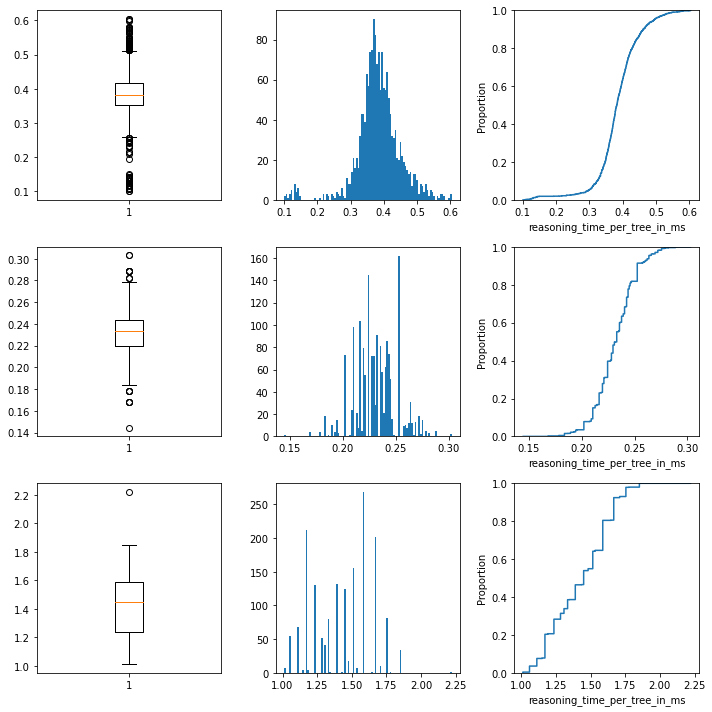

In [34]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for ax_row, (eps, df_eps) in zip(axs, df_runtimes.groupby("epsilon")):
    ax_row[0].boxplot(df_eps["reasoning_time_per_tree_in_ms"])
    ax_row[1].hist(df_eps["reasoning_time_per_tree_in_ms"], bins=100)
    sb.ecdfplot(data=df_eps["reasoning_time_per_tree_in_ms"], ax = ax_row[2])
    fig.tight_layout()
plt.show()

In [35]:
for key, df_dataset in df_runtimes.groupby(["openmlid"]):
    df_copy = df_dataset.copy()
    df_copy["ratio"] = df_dataset["reasoning_time_per_tree_in_ms"] / df_dataset["num_trees"] * 1000
    print(df_copy[["openmlid", "epsilon", "ratio"]])

    openmlid  epsilon     ratio
0          3    0.001  0.029406
1          3    0.010  0.084937
2          3    0.100  7.652280
3          3    0.001  0.025510
4          3    0.010  0.066632
5          3    0.100  5.598947
6          3    0.001  0.025730
7          3    0.010  0.063703
8          3    0.100  5.598947
9          3    0.001  0.026627
10         3    0.010  0.072792
11         3    0.100  7.620790
12         3    0.001  0.028696
13         3    0.010  0.090560
14         3    0.100  5.598947
    openmlid  epsilon     ratio
15         6    0.001  0.024355
16         6    0.010  0.070609
17         6    0.100  5.925926
18         6    0.001  0.023959
19         6    0.010  0.063592
20         6    0.100  5.925926
21         6    0.001  0.024179
22         6    0.010  0.055424
23         6    0.100  5.925926
24         6    0.001  0.024021
25         6    0.010  0.069747
26         6    0.100  7.001330
27         6    0.001  0.024122
28         6    0.010  0.070609
29      

     openmlid  epsilon     ratio
597       184    0.001  0.027971
598       184    0.010  0.063592
599       184    0.100  5.478852
600       184    0.001  0.024490
601       184    0.010  0.078084
602       184    0.100  5.478852
603       184    0.001  0.024383
604       184    0.010  0.060696
605       184    0.100  5.925926
606       184    0.001  0.025653
607       184    0.010  0.054627
608       184    0.100  5.478852
609       184    0.001  0.029761
610       184    0.010  0.074961
611       184    0.100  6.430041
612       184    0.001  0.027971
613       184    0.010  0.091099
614       184    0.100  6.430041
615       184    0.001  0.027586
616       184    0.010  0.057392
617       184    0.100  5.478852
618       184    0.001  0.027949
619       184    0.010  0.079357
620       184    0.100  5.925926
621       184    0.001  0.025469
622       184    0.010  0.078084
623       184    0.100  6.430041
     openmlid  epsilon      ratio
624       185    0.001   0.036626
625     

1910       837    0.100  7.652280
      openmlid  epsilon     ratio
1911       843    0.001  0.032514
1912       843    0.010  0.088568
1913       843    0.100  8.398421
1914       843    0.001  0.035291
1915       843    0.010  0.097949
1916       843    0.100  6.839711
1917       843    0.001  0.032318
1918       843    0.010  0.097949
1919       843    0.100  7.652280
1920       843    0.001  0.032318
1921       843    0.010  0.106282
1922       843    0.100  8.398421
1923       843    0.001  0.031071
1924       843    0.010  0.074320
1925       843    0.100  9.259259
1926       843    0.001  0.030030
1927       843    0.010  0.081624
1928       843    0.100  6.172840
1929       843    0.001  0.032826
1930       843    0.010  0.079711
1931       843    0.100  9.259259
1932       843    0.001  0.033667
1933       843    0.010  0.096437
1934       843    0.100  8.398421
1935       843    0.001  0.032826
1936       843    0.010  0.079357
1937       843    0.100  6.839711
      openmlid

      openmlid  epsilon     ratio
3192      1120    0.001  0.032514
3193      1120    0.010  0.097949
3194      1120    0.100  7.652280
3195      1120    0.001  0.032143
3196      1120    0.010  0.097949
3197      1120    0.100  8.398421
3198      1120    0.001  0.027219
3199      1120    0.010  0.081624
3200      1120    0.100  5.598947
3201      1120    0.001  0.031944
3202      1120    0.010  0.078084
3203      1120    0.100  8.398421
3204      1120    0.001  0.032109
3205      1120    0.010  0.088568
3206      1120    0.100  8.398421
3207      1120    0.001  0.029240
3208      1120    0.010  0.081624
3209      1120    0.100  6.172840
3210      1120    0.001  0.029907
3211      1120    0.010  0.090560
3212      1120    0.100  7.652280
3213      1120    0.001  0.028345
3214      1120    0.010  0.088568
3215      1120    0.100  5.598947
3216      1120    0.001  0.030074
3217      1120    0.010  0.097949
3218      1120    0.100  9.259259
3219      1120    0.001  0.031600
3220      1120

      openmlid  epsilon     ratio
4545     41065    0.001  0.023893
4546     41065    0.010  0.063769
4547     41065    0.100  5.080526
4548     41065    0.001  0.028090
4549     41065    0.010  0.067081
4550     41065    0.100  5.478852
4551     41065    0.001  0.024251
4552     41065    0.010  0.060373
4553     41065    0.100  5.080526
4554     41065    0.001  0.023932
4555     41065    0.010  0.063592
4556     41065    0.100  5.925926
4557     41065    0.001  0.023574
4558     41065    0.010  0.063769
4559     41065    0.100  6.298816
4560     41065    0.001  0.023706
4561     41065    0.010  0.063592
4562     41065    0.100  5.080526
4563     41065    0.001  0.023382
4564     41065    0.010  0.063592
4565     41065    0.100  5.080526
      openmlid  epsilon      ratio
4566     41066    0.001   0.033820
4567     41066    0.010   0.088568
4568     41066    0.100   7.620790
4569     41066    0.001   0.034710
4570     41066    0.010   0.088568
4571     41066    0.100   9.259259
4572   

In [52]:
def get_asrf_runtime_data(df):
    df_runtimes = df.copy()
    df_runtimes["overhead_per_tree_abs"] = df_runtimes["dist_time_per_tree_in_ms"] + df_runtimes["reasoning_time_per_tree_in_ms"]
    df_runtimes["overhead_per_tree_rel"] = df_runtimes["overhead_per_tree_abs"] / df_runtimes["train_time_per_tree_in_ms"]
    return df_runtimes

In [53]:
epsilons = []
overheads_abs = []
overheads_rel = []
for eps, df_eps in df_runtimes.groupby("epsilon"):
    epsilons.append(eps)
    df_runtimes_eps = get_asrf_runtime_data(df_eps)
    overheads_abs.append(df_runtimes_eps["overhead_per_tree_abs"].values)
    overheads_rel.append(df_runtimes_eps["overhead_per_tree_rel"].values)

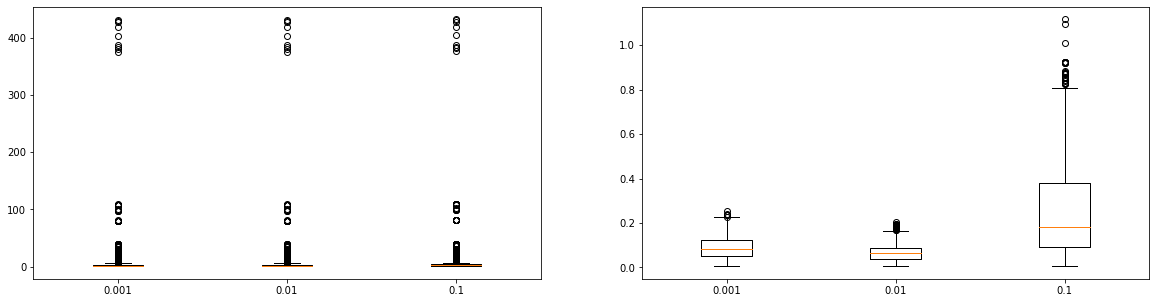

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].boxplot(overheads_abs)
axs[1].boxplot(overheads_rel)
for ax in axs:
    ax.set_xticklabels(epsilons)
plt.show()

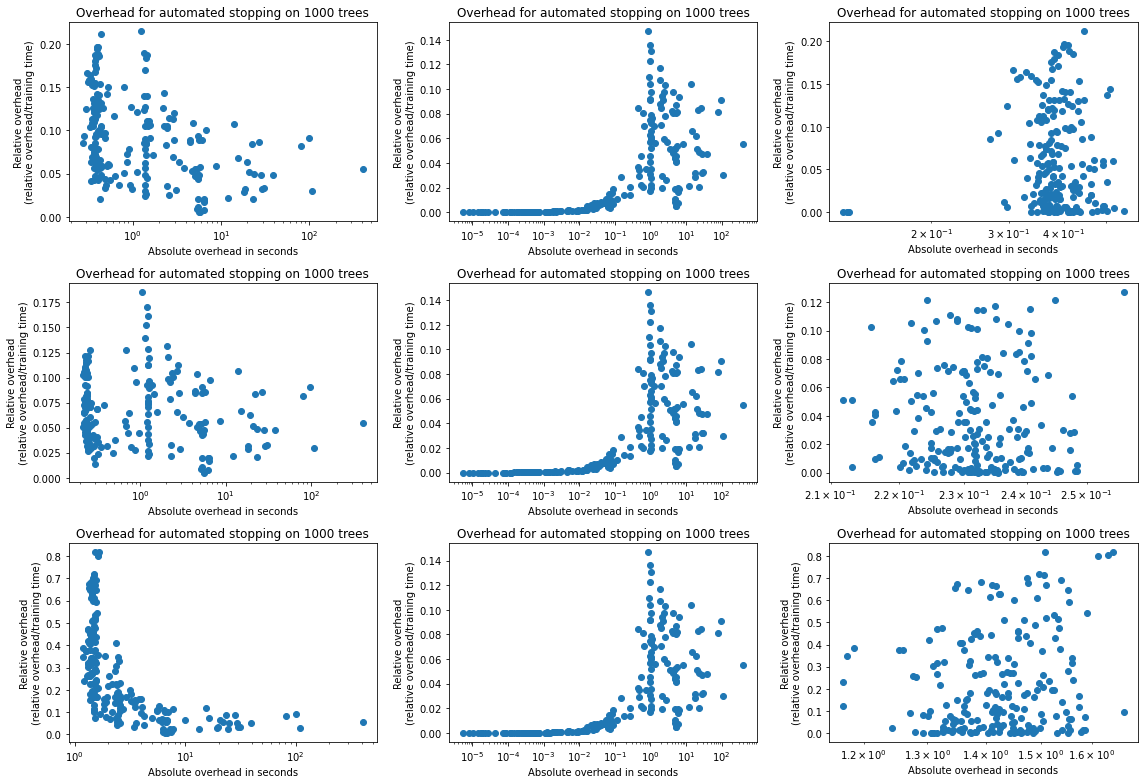

In [61]:
fig, axs = plt.subplots(3, 3, figsize=(16, 11))
for (eps, df_eps), ax_row in zip(df_runtimes.groupby("epsilon"), axs):
    df_runtimes_eps = get_asrf_runtime_data(df_eps)
    bases = ["overhead_per_tree_abs", "dist_time_per_tree_in_ms", "reasoning_time_per_tree_in_ms"]
    for base, ax in zip(bases, ax_row):
        df_runtimes_eps_avg = df_runtimes_eps.groupby("openmlid").mean()
        ax.scatter(df_runtimes_eps_avg[base], df_runtimes_eps_avg[base] / df_runtimes_eps_avg["train_time_per_tree_in_ms"])
        ax.set_xscale("log")
        ax.set_title("Overhead for automated stopping on 1000 trees")
        ax.set_xlabel("Absolute overhead in seconds")
        ax.set_ylabel("Relative overhead\n(relative overhead/training time)")
fig.tight_layout()
plt.show()

# 2. Runtime for Training 1000 Trees

## Time Invested to Compute Distributions

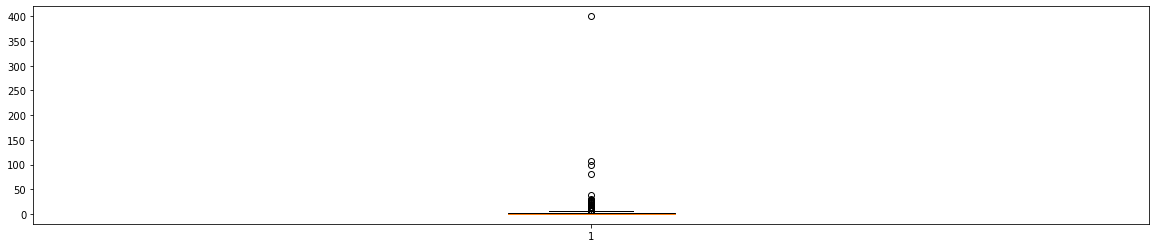

In [36]:
fig, ax = plt.subplots(figsize=(20, 4))
ax.boxplot(df_base["dist_time_per_tree_in_ms"])
plt.show()

## Overall Absolute and Relative Overhead per 1000 Trees

In [143]:
rows = []
keys = ["openmlid"]
keys.extend([f"runtime_100", f"runtime_1000", f"runtime_max_8", f"runtime_max_16"])
for key in ["oob", "test"]:
    keys.extend([f"score_{key}_100", f"score_{key}_1000", f"score_{key}_max_8", f"score_{key}_max_16"])
for key in ["oob", "test"]:
    keys.extend([f"gap_{key}_100", f"gap_{key}_1000", f"gap_{key}_max_8", f"gap_{key}_max_16"])
for openmlid, df_dataset in df_base.groupby("openmlid"):
    row_orig = df_dataset.iloc[0]
    oob_final = row_orig["score_oob_final"]
    test_final = row_orig["score_test_final"]
    row_new = [openmlid]
    sizes = [100, 1000, row_orig["max_trees_8"], row_orig["max_trees_16"]]
    row_new.extend([row_orig["train_time_per_tree_in_ms"] * size for size in sizes])
    oob_mean_scores = [get_score_on_curve(row_orig["mean_scores_oob"], size) for size in sizes]
    test_mean_scores = [get_score_on_curve(row_orig["mean_scores_test"], size) for size in sizes]
    row_new.extend(oob_mean_scores)
    row_new.extend(test_mean_scores)
    row_new.extend([s - oob_final for s in oob_mean_scores])
    row_new.extend([s - test_final for s in test_mean_scores])
    rows.append(row_new)
df_baselines = pd.DataFrame(rows, columns=keys)
df_baselines

openmlid    runtime_100  runtime_1000  runtime_max_8  runtime_max_16  \
0           3     311.097057  3.110971e+03   6.931709e+05    1.386345e+06   
1           6    2352.210282  2.352210e+04   1.724405e+05    3.449046e+05   
2          12     891.954586  8.919546e+03   1.974654e+06    3.949316e+06   
3          14     881.400870  8.814009e+03   1.001289e+06    2.002578e+06   
4          16     870.247953  8.702480e+03   1.050120e+06    2.100248e+06   
..        ...            ...           ...            ...             ...   
201     41166   30963.822246  3.096382e+05   8.239473e+05    1.647895e+06   
202     41167  733953.387001  7.339534e+06   2.275255e+05    4.550511e+05   
203     41168   48238.459738  4.823846e+05   1.693170e+06    3.386822e+06   
204     41169   56913.424905  5.691342e+05   1.485440e+05    2.970881e+05   
205     41946     317.464097  3.174641e+03   1.644042e+06    3.288084e+06   

     score_oob_100  score_oob_1000  score_oob_max_8  score_oob_max_16  \
0           0.0691          0.0373           0.0297            0.0297   
1           0.1685          0.1269           0.1170            0.1154   
2           0.1519          0.1097           0.0974            0.0974   
3           0.3478          0.2998           0.2849            0.2849   
4           0.2618          0.2101           0.1929            0.1929   
..             ...             ...              ...               ...   
201         0.5266          0.4841           0.4778            0.4752   
202         0.2544          0.2069           0.3171            0.2750   
203         0.4583          0.4210           0.4149            0.4131   
204         0.8342          0.7928           0.8097            0.7993   
205         0.0642          0.0359           0.0304            0.0304   

     score_test_100  ...  score_test_max_8  score_test_max_16  gap_oob_100  \
0            0.0282  ...            0.0270             0.0270     0.039419   
1            0.1153  ...            0.1107             0.1107     0.053600   
2            0.0950  ...            0.0914             0.0914     0.054500   
3            0.2896  ...            0.2819             0.2819     0.062900   
4            0.1923  ...            0.1875             0.1875     0.068900   
..              ...  ...               ...                ...          ...   
201          0.4779  ...            0.4712             0.4710     0.054100   
202          0.1931  ...            0.2066             0.1968     0.055489   
203          0.4139  ...            0.4090             0.4090     0.046400   
204          0.7879  ...            0.7824             0.7806     0.046442   
205          0.0312  ...            0.0302             0.0302     0.033800   

     gap_oob_1000  gap_oob_max_8  gap_oob_max_16  gap_test_100  gap_test_1000  \
0        0.007619   1.919192e-05    1.919192e-05      0.001200       0.000400   
1        0.012000   2.100000e-03    5.000000e-04      0.004600       0.000400   
2        0.012300  -1.387779e-17   -1.387779e-17      0.003600       0.000100   
3        0.014900   0.000000e+00    0.000000e+00      0.007700       0.001000   
4        0.017200  -5.551115e-17   -5.551115e-17      0.004800       0.000300   
..            ...            ...             ...           ...            ...   
201      0.011600   5.300000e-03    2.700000e-03      0.007000       0.000600   
202      0.007989   1.181889e-01    7.608889e-02      0.006100       0.000400   
203      0.009100   3.000000e-03    1.200000e-03      0.005000       0.000400   
204      0.005042   2.194242e-02    1.154242e-02      0.008600       0.000500   
205      0.005500  -3.469447e-18   -3.469447e-18      0.000999       0.000099   

     gap_test_max_8  gap_test_max_16  
0     -1.040834e-17    -1.040834e-17  
1      1.387779e-17     1.387779e-17  
2     -1.387779e-17    -1.387779e-17  
3      5.551115e-17     5.551115e-17  
4      0.000000e+00     0.000000e+00  
..              ...              ...  
201    3.000000e-04 

In [164]:
def get_asrf_performance(eps, w_min = None, delta = None, c = None, bootstrap_repeats = 0):
    w_min = int(np.round(1 / eps))
    c = int(np.round(100 / eps))
    delta = w_min
    
    mask_eps = df_sensitivity_results["epsilon"] == eps
    mask_w_min = df_sensitivity_results["w_min"] == w_min
    mask_delta = df_sensitivity_results["delta"] == delta
    mask_c = df_sensitivity_results["c"] == c
    mask_bootstrap = df_sensitivity_results["bootstrap_repeats"] == bootstrap_repeats
    df_asrf = df_sensitivity_results[mask_eps & mask_w_min & mask_delta & mask_c & mask_bootstrap].reset_index().drop(columns=["index"])
    df_asrf = df_asrf.merge(get_asrf_runtime_data(df_asrf).drop(columns=["reasoning_time_per_tree_in_ms"]), on=["openmlid", "epsilon"])
    df_asrf["runtime_as"] = df_asrf["num_trees"] * (df_asrf["train_time_per_tree_in_ms"] + df_asrf["dist_time_per_tree_in_ms"] + df_asrf["reasoning_time_per_tree_in_ms"])
    return df_asrf[["openmlid", "num_trees", "runtime_as", "score_oob_as", "score_test_as", "gap_oob_as", "gap_test_as"]]

# 3. What is the difference in runtime and performance compared to a RF with a fixed number of trees?

In [145]:
print(np.count_nonzero(df_baselines["gap_oob_100"] > 0.01) / len(df_baselines))
print(np.count_nonzero(df_baselines["gap_oob_1000"] > 0.01) / len(df_baselines))
print(np.count_nonzero(df_baselines["gap_test_100"] > 0.01) / len(df_baselines))
print(np.count_nonzero(df_baselines["gap_test_1000"] > 0.01) / len(df_baselines))

0.9951456310679612
0.24757281553398058
0.0
0.0


In [180]:
def plot_comparison(eps_oob = 0.1, eps_test = 0.001):
    
    df = get_asrf_performance(eps_oob).merge(df_baselines, on="openmlid")

    marker_size = 10
    
    min_gap_test = np.min(df["gap_test_as"])
    min_gap_oob = np.min(df["gap_test_as"])

    fig, axs = plt.subplots(2, 2, figsize=(15, 8))
    ax = axs[0][0]
    ax.scatter(df["gap_test_as"], df["gap_test_100"], s=marker_size, label="100 trees")
    ax.scatter(df["gap_test_as"], df["gap_test_1000"], s=marker_size, label="1000 trees")
    ax.scatter(df["gap_test_as"], df["gap_test_max_16"], s=marker_size, marker="x", label="1000 trees 16GB")
    #ax.scatter(df_joint["gap"], df_joint["gap_max_8"], s=10, marker="*", label="1000 trees 8GB")
    ax.plot([min_gap_test, eps_test], [min_gap_test, eps_test], color="black", linestyle="--", linewidth=1)
    ax.axhline(eps_test, color="red", linestyle="--", linewidth=1)
    ax.axvline(eps_test, color="red", linestyle="--", linewidth=1)
    ax.axhline(0, color="green", linestyle="--", linewidth=1)
    ax.axvline(0, color="green", linestyle="--", linewidth=1)
    ax.set_xlabel("Gap of ASRF with 64GB")
    ax.set_ylabel("Gap of Standad RF")
    ax.legend()

    ax = axs[0][1]
    ax.scatter(df["gap_oob_as"], df["gap_oob_100"], s=marker_size, label="100 trees")
    ax.scatter(df["gap_oob_as"], df["gap_oob_1000"], s=marker_size, label="1000 trees")
    ax.scatter(df["gap_oob_as"], df["gap_oob_max_16"], s=marker_size, marker="x", label="1000 trees 16GB")
    #ax.scatter(df_joint["gap"], df_joint["gap_max_8"], s=10, marker="*", label="1000 trees 8GB")
    ax.plot([min_gap_oob, eps_oob], [min_gap_oob, eps_oob], color="black", linestyle="--", linewidth=1)
    ax.axhline(eps_oob, color="red", linestyle="--", linewidth=1)
    ax.axvline(eps_oob, color="red", linestyle="--", linewidth=1)
    ax.axhline(0, color="green", linestyle="--", linewidth=1)
    ax.axvline(0, color="green", linestyle="--", linewidth=1)
    ax.set_xlabel("Gap of ASRF with 64GB")
    ax.set_ylabel("Gap of Standad RF")
    ax.legend()


    ax = axs[1][0]
    ax.scatter(df["runtime_as"] / 1000, df["runtime_100"] / 1000, s=marker_size, label="100 trees")
    ax.scatter(df["runtime_as"] / 1000, df["runtime_1000"] / 1000, s=marker_size, label="1000 trees")
    ax.scatter(df["runtime_as"] / 1000, df["runtime_max_16"] / 1000, s=marker_size, marker="x", label="max trees 16GB")
    #ax.scatter(df_joint["runtime_as"], df_joint["runtime_max_8"], s=5, label="max trees 8GB")
    ax.plot([0, 10**5], [0, 10**5], color="black", linestyle="--", linewidth=1)

    timeout_in_s = 20 * 60
    num_cpus = 8
    ax.axhline(timeout_in_s * num_cpus, color="red", linestyle="--", linewidth=1)
    ax.axvline(timeout_in_s * num_cpus, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("Runtime (seconds) of ASRF with 64GB")
    ax.set_ylabel("Runtime (seconds) of Standad RF")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.legend()

    ax = axs[1][1]
    sb.histplot(df, x="num_trees", bins=50, kde=True, ax = ax)
    ax.set_yscale("log")
    ax.set_xlabel("Number of Trees")
    return fig

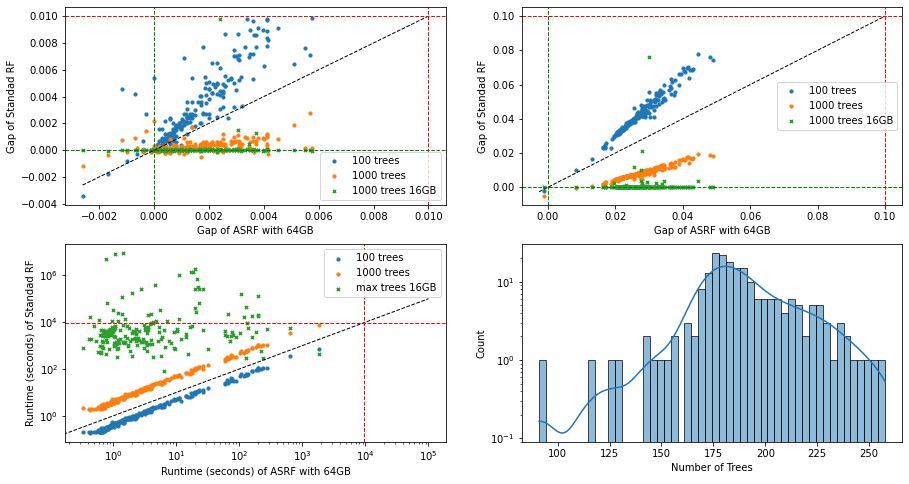

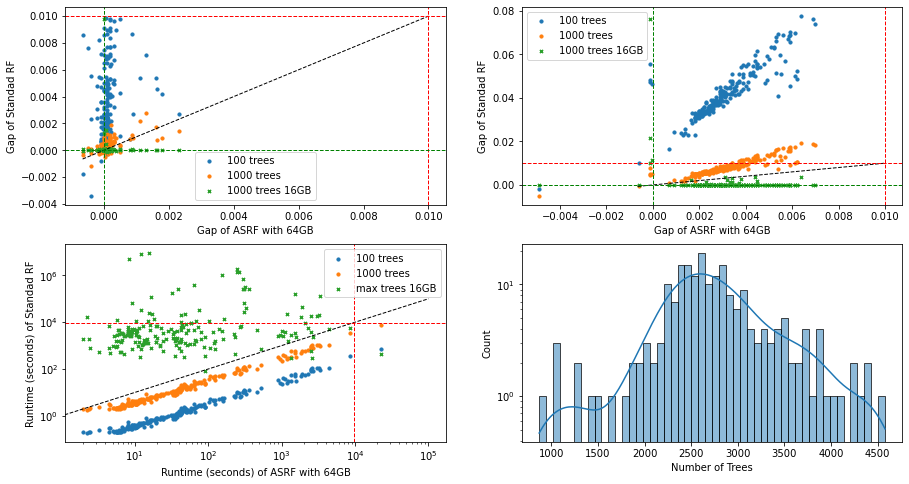

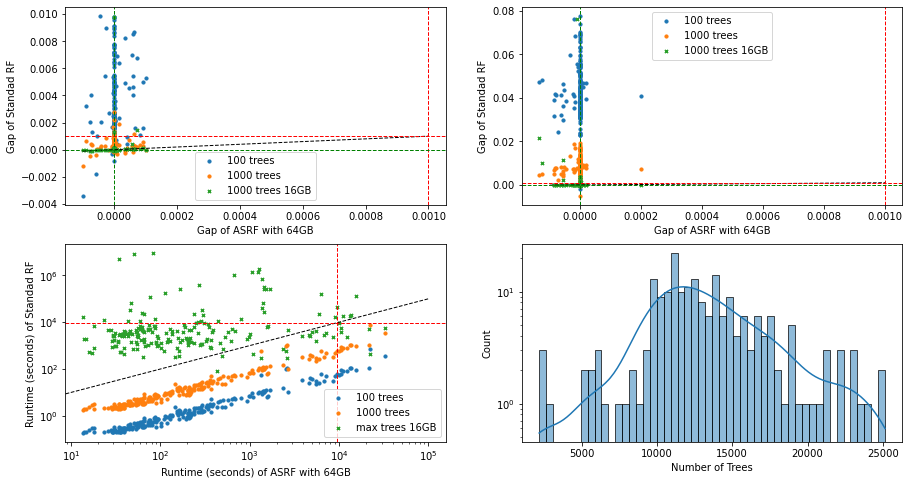

In [181]:
plot_comparison(0.1, 0.01)
plt.show()
plot_comparison(0.01, 0.01)
plt.show()
plot_comparison(0.001, 0.001)
plt.show()

In [ ]:

df_baselines = get_results_for_number_of_trees(100, '_100').merge(get_results_for_number_of_trees(1000, '_1000'), on=["openmlid", "seed"]).merge(get_results_for_number_of_trees(df_base[["openmlid", "seed", "max_trees_8"]].rename(columns={"max_trees_8": "num_trees"}), '_8g'), on=["openmlid", "seed"]).merge(get_results_for_number_of_trees(df_base[["openmlid", "seed", "max_trees_16"]].rename(columns={"max_trees_16": "num_trees"}), '_16g'), on=["openmlid", "seed"])
df_baselines

# 1. Stopping Performance vs. Limit Performance

/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


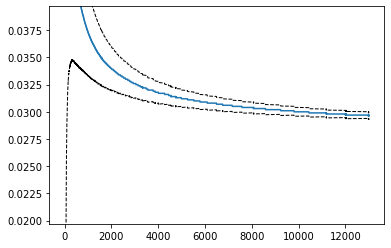

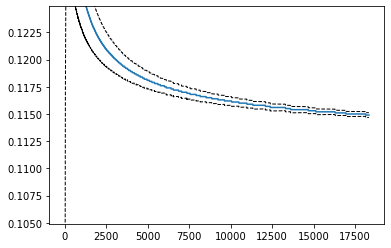

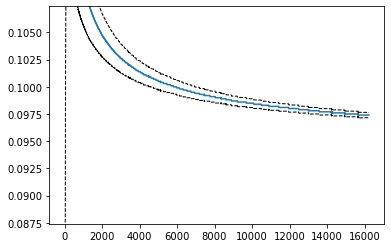

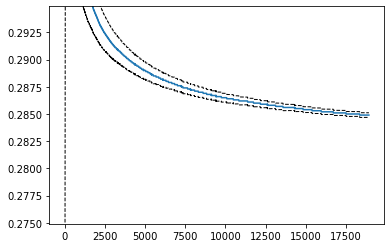

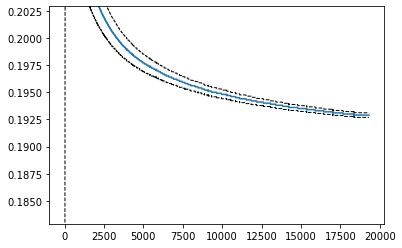

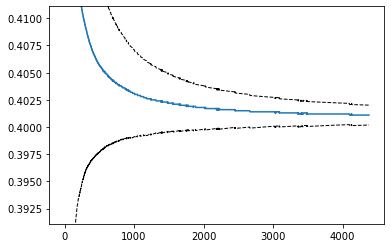

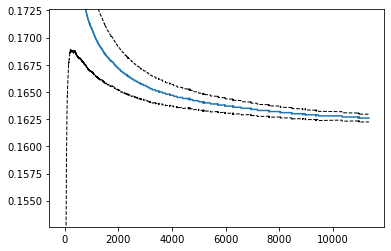

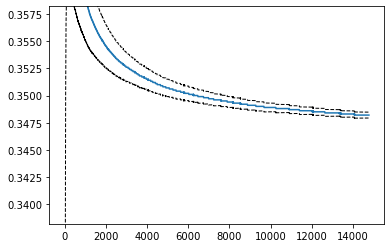

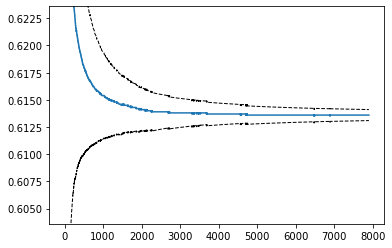

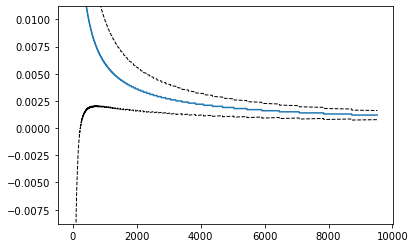

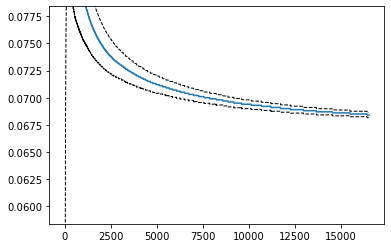

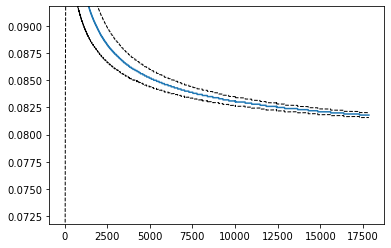

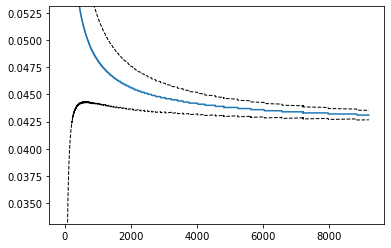

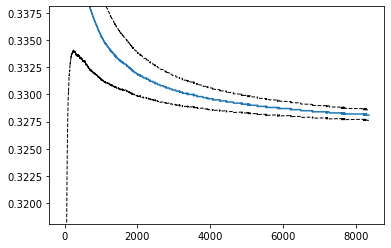

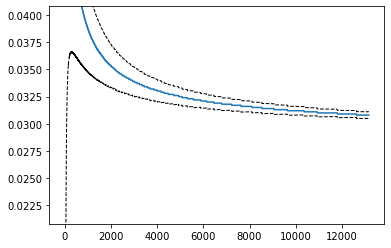

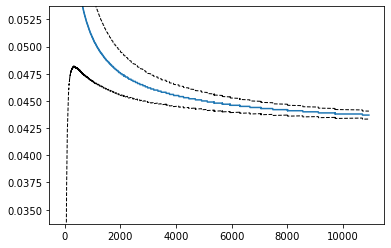

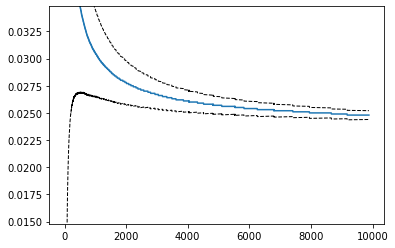

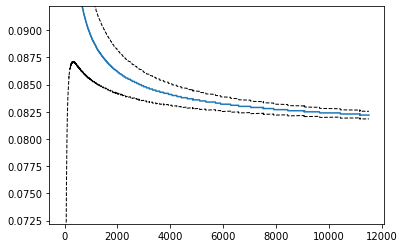

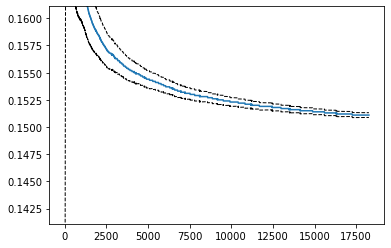

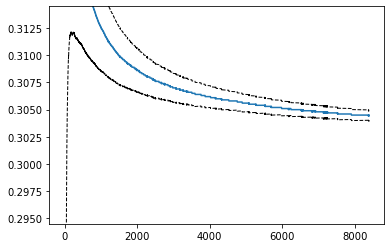

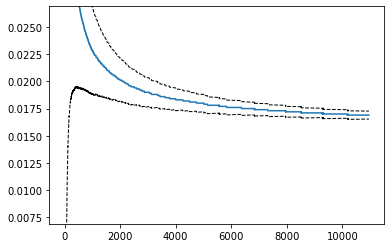

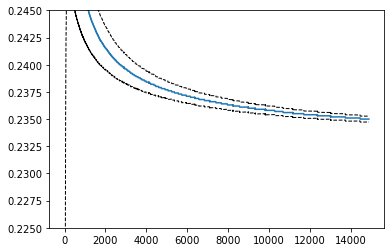

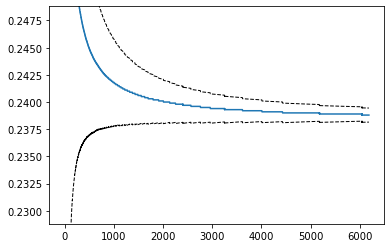

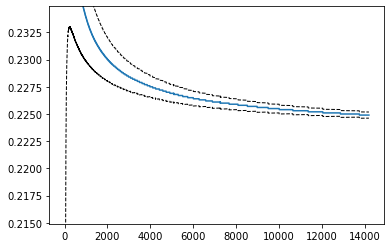

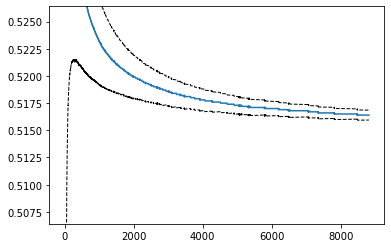

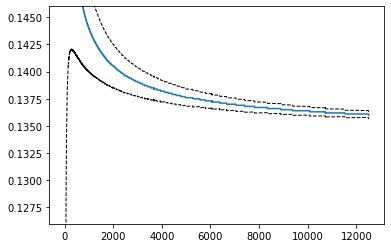

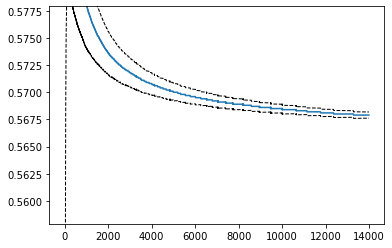

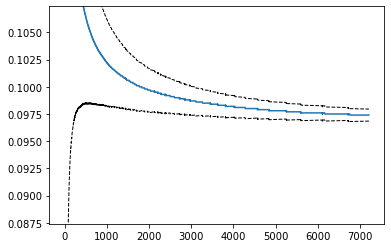

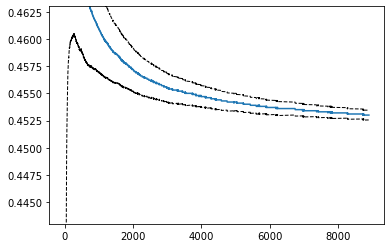

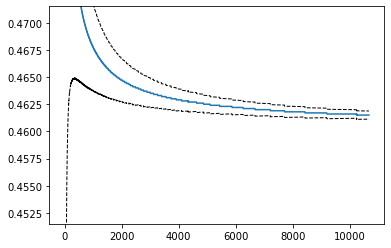

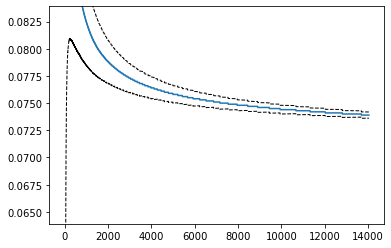

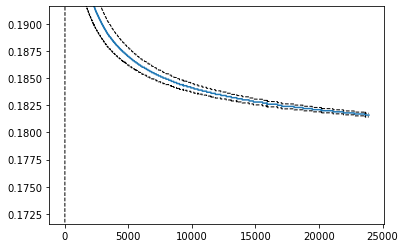

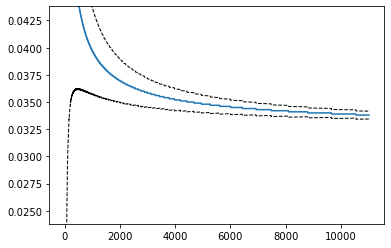

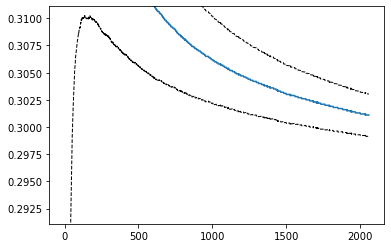

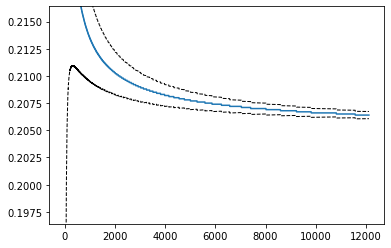

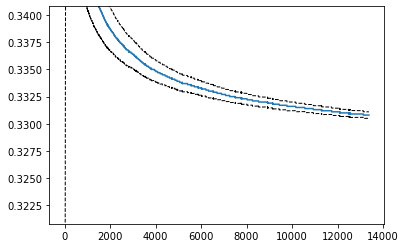

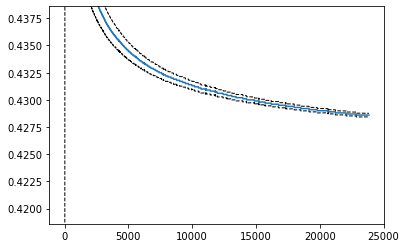

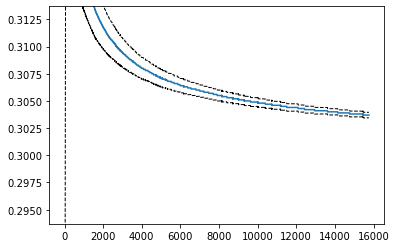

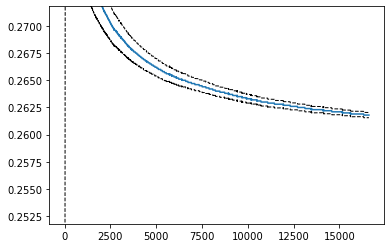

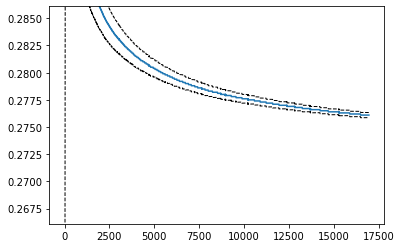

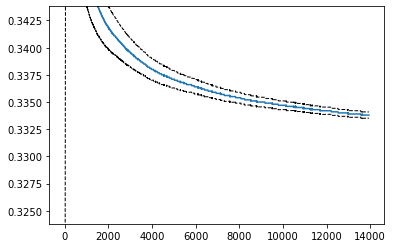

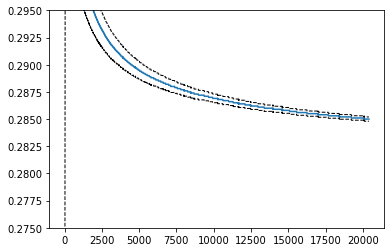

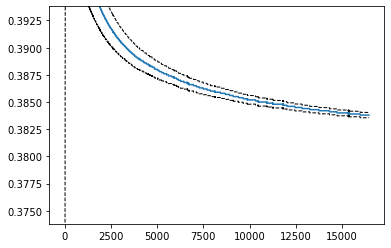

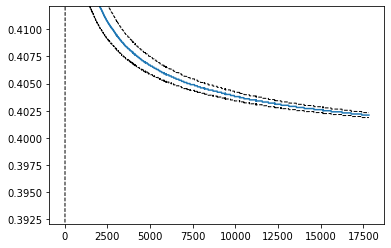

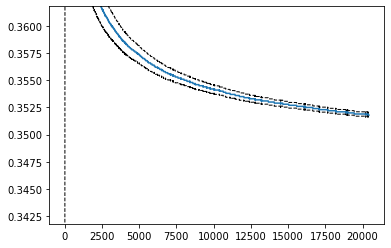

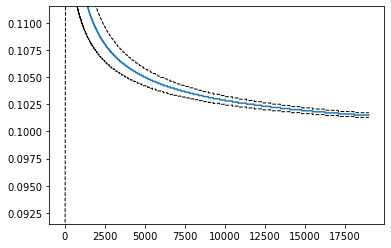

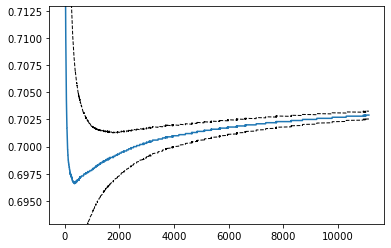

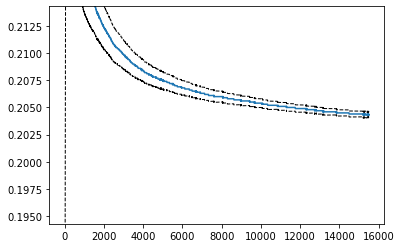

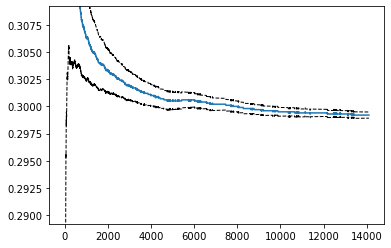

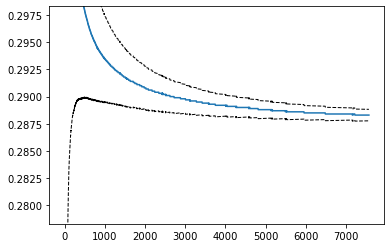

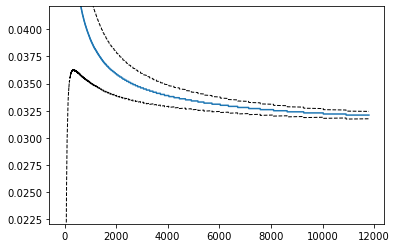

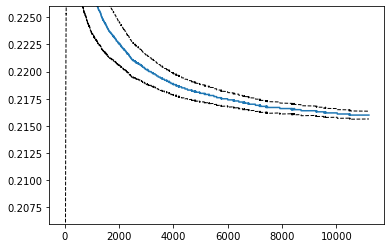

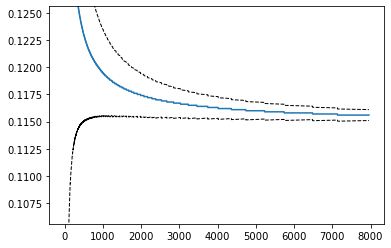

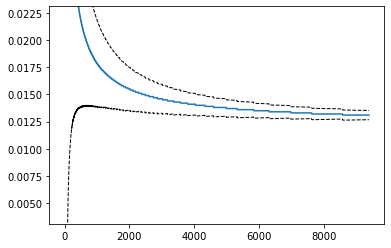

KeyboardInterrupt: 

In [3]:
for openmlid, df_dataset in df_base.groupby("openmlid"):
    row = df_dataset.iloc[0]
    curve = row["mean_scores_oob"]
    fig, ax = plt.subplots()
    domain = np.array(range(len(curve)))
    ax.plot(domain, curve)
    ax.plot(domain, curve + 4/domain, color="black", linestyle="--", linewidth=1)
    ax.plot(domain, curve - 4/domain, color="black", linestyle="--", linewidth=1)
    final = curve[-1]
    ax.set_ylim([final - 0.01, final + 0.01])
    plt.show()